In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
plt.style.use('tableau-colorblind10')
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 
         'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

In [2]:
df_train = pd.read_csv('cleaned_data.csv')

In [3]:
df_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,Y,1,level_0,...,2,3,2,3,0,46.37,0.0,0,36,10
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,Y,0,level_1,...,4,3,0,0,1,47.68,0.0,0,32,14
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,Y,1,level_1,...,10,9,6,2,1,40.73,0.0,0,51,32
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,Y,2,level_1,...,11,6,0,4,10,47.42,0.0,0,54,34
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,Y,3,level_1,...,9,8,2,3,0,47.18,0.0,0,56,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11147,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,Y,1,level_5,...,3,3,0,4,1,50.87,0.0,0,35,5
11148,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,Y,2,level_5,...,1,2,0,6,0,79.91,0.0,0,33,6
11149,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,Y,0,level_5,...,1,2,0,4,0,78.38,0.0,0,30,4
11150,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,Y,1,level_5,...,5,4,0,4,1,85.94,1.0,0,34,9


## Data Summary

In [4]:
summary = []

for col in df_train.columns:
    summary.append([col, df_train[col].dtype, df_train[col].isnull().sum(),
                   round(df_train[col].isnull().sum()/len(df_train)*100,2), 
                   df_train[col].nunique(), list(df_train[col].sample(5).drop_duplicates().values)
                   ])
    
df_summary = pd.DataFrame(summary, columns='column dtype null null_Pct nunique sample'.split(" "))
df_summary

,column,dtype,null,null_Pct,nunique,sample
0,job_level,object,0,0.0,3,"[JG04, JG05]"
1,job_duration_in_current_job_level,float64,0,0.0,97,"[1.6822603841260702, 1.2569805089976498, 1.292..."
2,person_level,object,0,0.0,8,[PG03]
3,job_duration_in_current_person_level,float64,0,0.0,72,"[1.3228756555323, 1.58113883008419, 0.70710678..."
4,job_duration_in_current_branch,float64,0,0.0,69,"[1.15325625946708, 0.707106781186548, 1.581138..."
5,Employee_type,object,0,0.0,3,"[RM_type_B, RM_type_A]"
6,gender,int64,0,0.0,2,"[2, 1]"
7,marital_status_maried(Y/N),object,0,0.0,2,[Y]
8,number_of_dependences,int64,0,0.0,7,"[0, 3, 1]"
9,Education_level,object,0,0.0,6,[level_4]


# EDA

## EDA

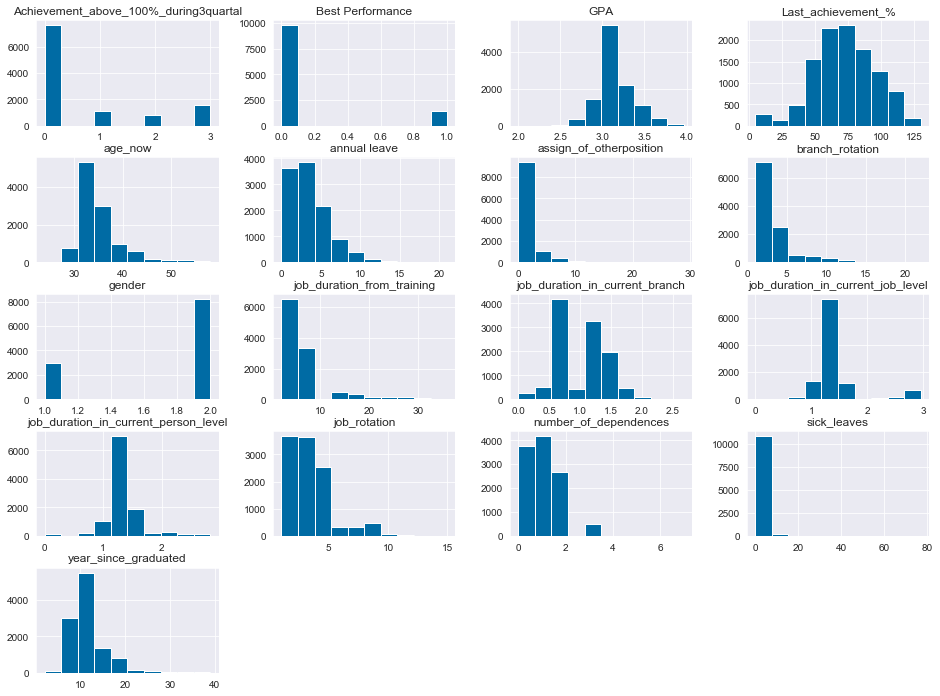

In [5]:
df_train.hist(figsize=(16,12))
plt.show()

### `job_level`

In [6]:
df_train['job_level'].value_counts()

JG04    10412
JG05      704
JG03       36
Name: job_level, dtype: int64

In [7]:
JG = ['JG03','JG04','JG05']

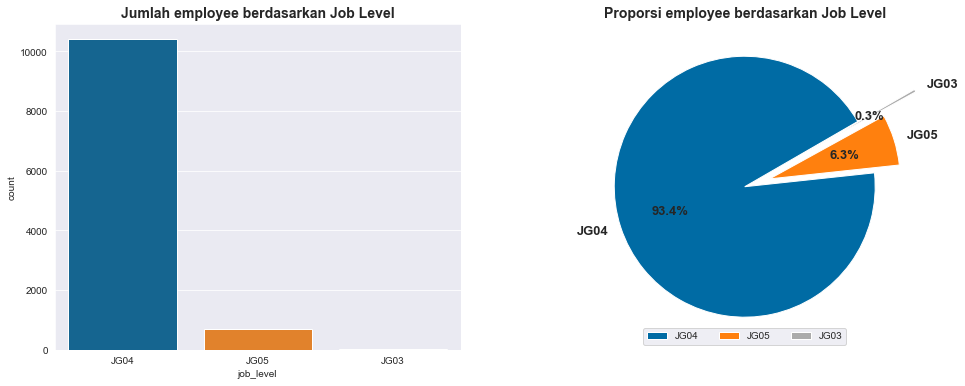

In [8]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('Jumlah employee berdasarkan Job Level', fontsize=14, fontweight='bold')
sns.countplot(df_train['job_level'])
plt.subplot(122)
plt.title('Proporsi employee berdasarkan Job Level', fontsize=14, fontweight='bold')
plt.pie(df_train['job_level'].value_counts(), 
       autopct='%.1f%%', labels=df_train['job_level'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, explode=[0,0.2,0.5], startangle=30)

plt.legend(loc='lower center', ncol=3)
plt.show()

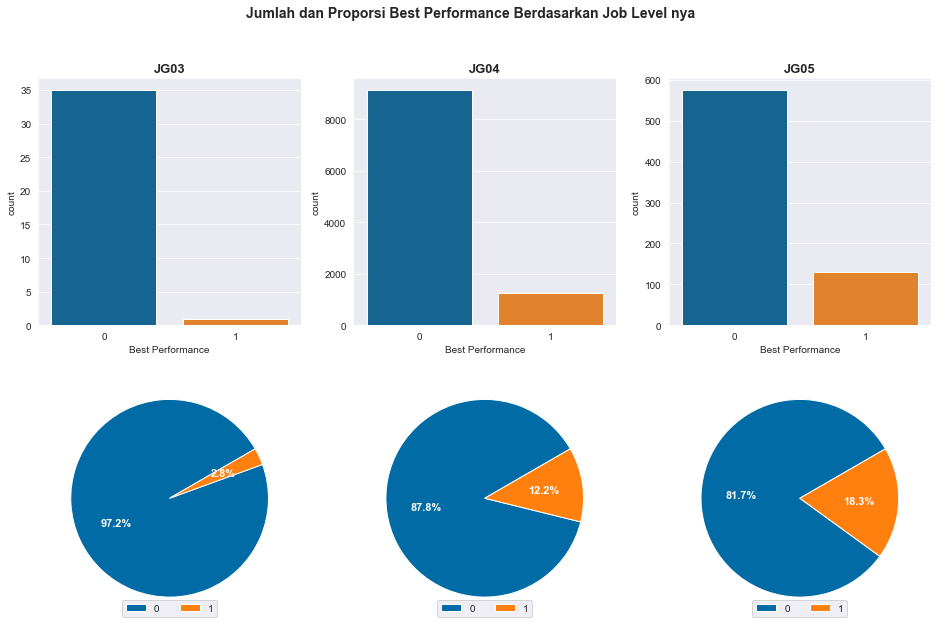

In [9]:
plt.figure(figsize=(16,10))
plt.suptitle('Jumlah dan Proporsi Best Performance Berdasarkan Job Level nya', fontsize=14, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(2,3,i+1)
    plt.title(JG[i], fontweight='bold', fontsize=13)
    sns.countplot(df_train[df_train['job_level']==JG[i]]['Best Performance'].sort_values())
    plt.subplot(2,3,i+4)
    plt.pie(df_train[df_train['job_level']==JG[i]]['Best Performance'].value_counts().sort_index(), 
            autopct='%.1f%%', startangle=30, 
            labels=df_train[df_train['job_level']==JG[i]]['Best Performance'].value_counts().index, 
            textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
    plt.legend(loc='lower center', ncol=4)

### `job_duration_in_current_job_level`

Masa Kerja pada job level (Job Grading) saat ini

In [10]:
df_train['job_duration_in_current_job_level'].value_counts()

1.352775    1517
1.385641    1424
1.224745     902
1.322876     841
1.256981     736
            ... 
1.892089       1
2.915476       1
2.061553       1
2.958040       1
1.754993       1
Name: job_duration_in_current_job_level, Length: 97, dtype: int64

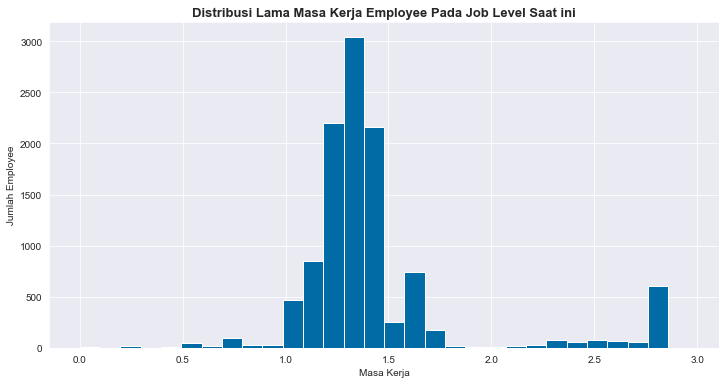

In [11]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Lama Masa Kerja Employee Pada Job Level Saat ini', fontsize=13, fontweight='bold')
df_train['job_duration_in_current_job_level'].hist(bins=30)
plt.xlabel('Masa Kerja')
plt.ylabel('Jumlah Employee')
plt.show()

- Masa Kerja Employee Pada Job Levelnya saat ini, mayoritas terdistiribusi pada durasi 1.2 - 1.4 tahun

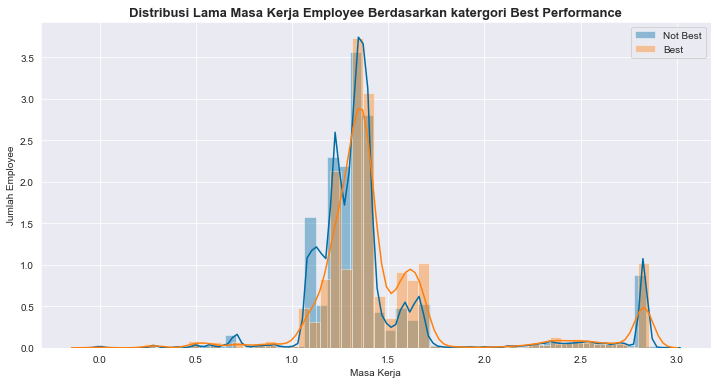

In [12]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Lama Masa Kerja Employee Berdasarkan katergori Best Performance', fontsize=13, fontweight='bold')
sns.distplot(df_train[df_train['Best Performance']==0]['job_duration_in_current_job_level'],label='Not Best')
sns.distplot(df_train[df_train['Best Performance']==1]['job_duration_in_current_job_level'],label='Best')
plt.xlabel('Masa Kerja')
plt.ylabel('Jumlah Employee')
plt.legend()
plt.show()

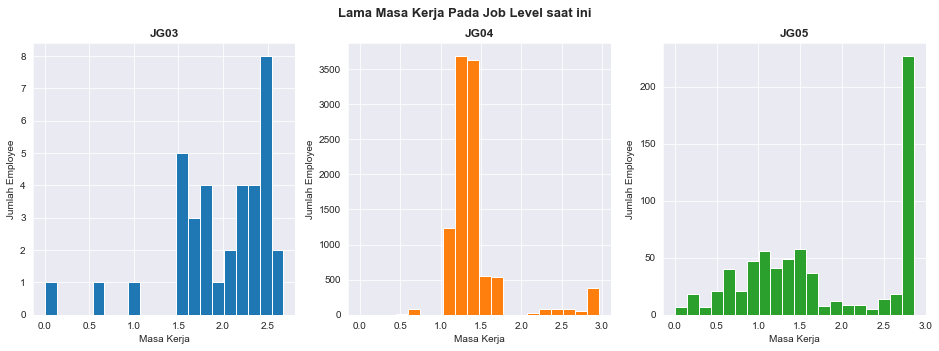

In [13]:
plt.figure(figsize=(16,5))
plt.suptitle('Lama Masa Kerja Pada Job Level saat ini', fontsize=13, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(1,3,i+1)
    plt.title(JG[i], fontweight='bold')
    df_train[df_train['job_level']==JG[i]]['job_duration_in_current_job_level'].hist(bins=20, color=color[i])
    plt.xlabel('Masa Kerja')
    plt.ylabel('Jumlah Employee')
plt.show()

### `person_level`

Level personal Pekerja

In [14]:
PG = ['PG01','PG02','PG03','PG04','PG05','PG06','PG07','PG08']

In [15]:
df_train['person_level'].value_counts()

PG03    9654
PG04     757
PG06     378
PG05     308
PG07      19
PG01      19
PG02      16
PG08       1
Name: person_level, dtype: int64

In [16]:
df_train['person_level'].sort_values()

820     PG01
2947    PG01
3568    PG01
6960    PG01
3556    PG01
        ... 
5245    PG07
3717    PG07
3751    PG07
9015    PG07
2083    PG08
Name: person_level, Length: 11152, dtype: object

In [17]:
df_train['person_level'].value_counts().sort_index()

PG01      19
PG02      16
PG03    9654
PG04     757
PG05     308
PG06     378
PG07      19
PG08       1
Name: person_level, dtype: int64

In [18]:
df_train['person_level'].value_counts().sort_index()

PG01      19
PG02      16
PG03    9654
PG04     757
PG05     308
PG06     378
PG07      19
PG08       1
Name: person_level, dtype: int64

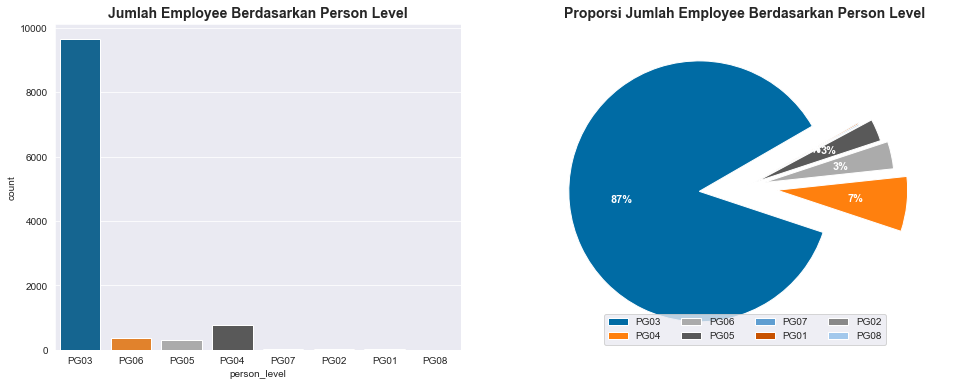

In [19]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Jumlah Employee Berdasarkan Person Level', fontsize=14, fontweight='bold')
sns.countplot(df_train['person_level'])
plt.subplot(122)
plt.title('Proporsi Jumlah Employee Berdasarkan Person Level', fontsize=14, fontweight='bold')
plt.pie(df_train['person_level'].value_counts(), autopct='%.0f%%', startangle=30, 
       labels=df_train['person_level'].value_counts().index, explode=[0.35,0.25,0.15,0.1,0,0,0,0],
       textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
plt.legend(loc='lower center', ncol=4)
plt.show()

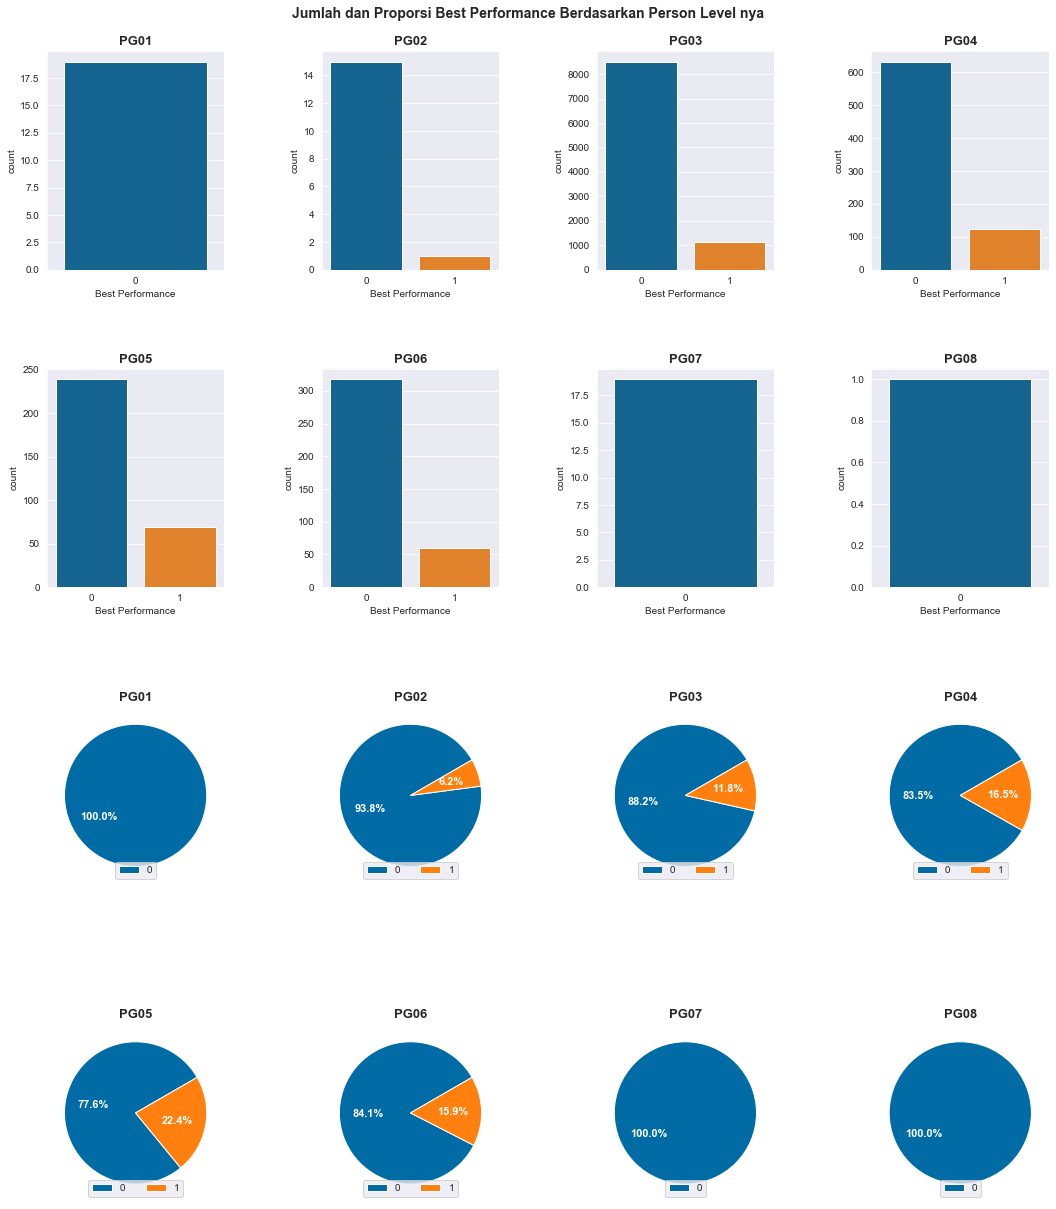

In [20]:
plt.figure(figsize=(16,18))
plt.suptitle('Jumlah dan Proporsi Best Performance Berdasarkan Person Level nya', fontsize=14, fontweight='bold')
for i in range(len(PG)):
    plt.subplot(4,4,i+1)
    plt.title(PG[i], fontweight='bold', fontsize=13)
    sns.countplot(df_train[df_train['person_level']==PG[i]]['Best Performance'].sort_values())
    plt.subplot(4,4,i+9)
    plt.title(PG[i], fontweight='bold', fontsize=13)
    plt.pie(df_train[df_train['person_level']==PG[i]]['Best Performance'].value_counts().sort_index(), 
            autopct='%.1f%%', startangle=30, 
            labels=df_train[df_train['person_level']==PG[i]]['Best Performance'].value_counts().index, 
            textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
    plt.legend(loc='lower center', ncol=4)
plt.tight_layout(pad=5.5)

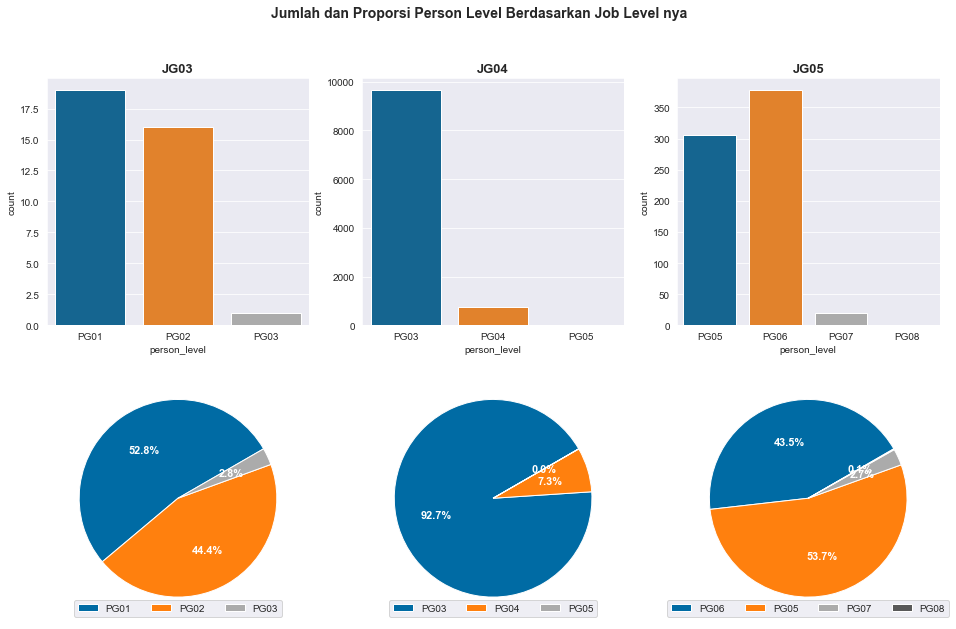

In [21]:
plt.figure(figsize=(16,10))
plt.suptitle('Jumlah dan Proporsi Person Level Berdasarkan Job Level nya', fontsize=14, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(2,3,i+1)
    plt.title(JG[i], fontweight='bold', fontsize=13)
    sns.countplot(df_train[df_train['job_level']==JG[i]]['person_level'].sort_values())
    plt.subplot(2,3,i+4)
    plt.pie(df_train[df_train['job_level']==JG[i]]['person_level'].value_counts().sort_index(), 
            autopct='%.1f%%', startangle=30, 
            labels=df_train[df_train['job_level']==JG[i]]['person_level'].value_counts().index, 
            textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
    plt.legend(loc='lower center', ncol=4)

### `Job_duration_in_current_person_level`

Masa Kerja pada person level saat ini

In [22]:
df_train['job_duration_in_current_person_level'].value_counts()

1.352775    1511
1.385641    1425
1.224745     953
1.322876     841
1.256981     736
            ... 
1.849324       1
2.218107       1
2.019901       1
2.783882       1
2.533772       1
Name: job_duration_in_current_person_level, Length: 72, dtype: int64

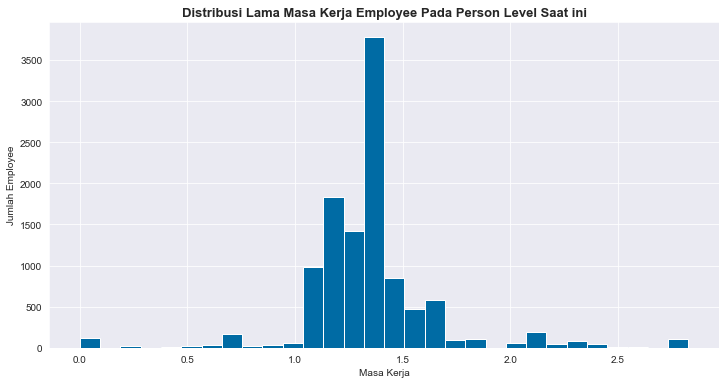

In [23]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Lama Masa Kerja Employee Pada Person Level Saat ini', fontsize=13, fontweight='bold')
df_train['job_duration_in_current_person_level'].hist(bins=30)
plt.xlabel('Masa Kerja')
plt.ylabel('Jumlah Employee')
plt.show()

Mayoritas Employee Bekerja selama 1.2 - 1.4 tahun dengan status person levelnya saat ini

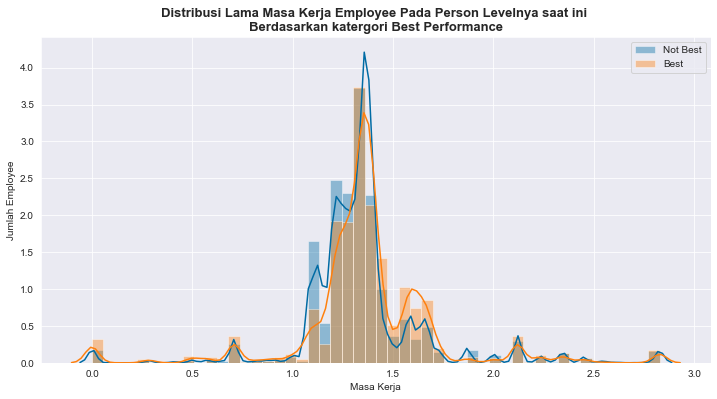

In [24]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Lama Masa Kerja Employee Pada Person Levelnya saat ini \nBerdasarkan katergori Best Performance', fontsize=13, fontweight='bold')
sns.distplot(df_train[df_train['Best Performance']==0]['job_duration_in_current_person_level'],label='Not Best')
sns.distplot(df_train[df_train['Best Performance']==1]['job_duration_in_current_person_level'],label='Best')
plt.xlabel('Masa Kerja')
plt.ylabel('Jumlah Employee')
plt.legend()
plt.show()

In [25]:
PG = df_train['person_level'].value_counts().index.sort_values()
PG

Index(['PG01', 'PG02', 'PG03', 'PG04', 'PG05', 'PG06', 'PG07', 'PG08'], dtype='object')

In [26]:
df_train[df_train['person_level']=='PG01']['job_duration_in_current_person_level']

401      1.824829
820      1.732051
1270     2.161018
1889     1.581139
1977     1.870829
2166     1.581139
2502     1.732051
2947     1.606238
3015     1.849324
3556     2.218107
3568     2.549510
5136     1.870829
5391     1.581139
6960     1.658312
7425     1.581139
7897     2.000000
7952     2.515949
8710     2.121320
11073    2.362202
Name: job_duration_in_current_person_level, dtype: float64

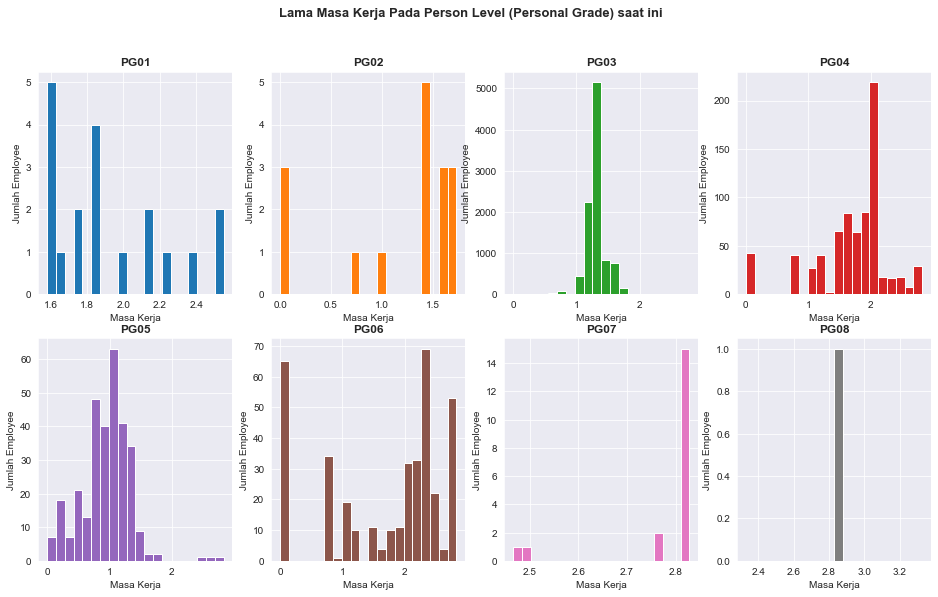

In [27]:
plt.figure(figsize=(16,9))
plt.suptitle('Lama Masa Kerja Pada Person Level (Personal Grade) saat ini', fontsize=13, fontweight='bold')
for i in range(len(PG)):
    plt.subplot(2,4,i+1)
    plt.title(PG[i], fontweight='bold')
    df_train[df_train['person_level']==PG[i]]['job_duration_in_current_person_level'].hist(bins=20, color=color[i])
    plt.xlabel('Masa Kerja')
    plt.ylabel('Jumlah Employee')

plt.show()

### `job_duration_in_current_branch`

Masa Kerja pada unit kerja saat ini

In [28]:
df_train['job_duration_in_current_branch']

0        1.732051
1        1.039230
2        1.780449
3        1.385641
4        0.707107
           ...   
11147    1.224745
11148    1.802776
11149    1.385641
11150    0.000000
11151    1.473092
Name: job_duration_in_current_branch, Length: 11152, dtype: float64

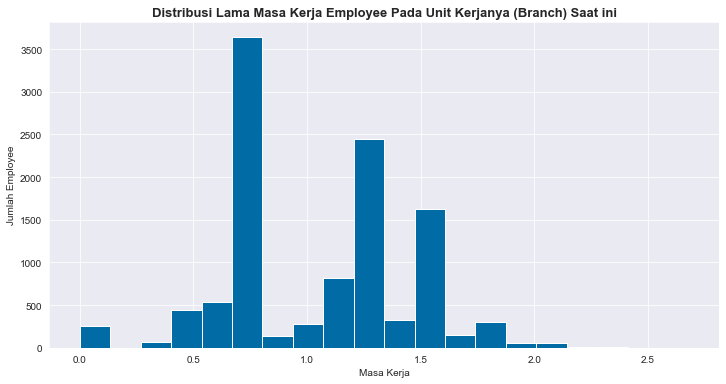

In [29]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Lama Masa Kerja Employee Pada Unit Kerjanya (Branch) Saat ini', fontsize=13, fontweight='bold')
df_train['job_duration_in_current_branch'].hist(bins=20)
plt.xlabel('Masa Kerja')
plt.ylabel('Jumlah Employee')
plt.show()

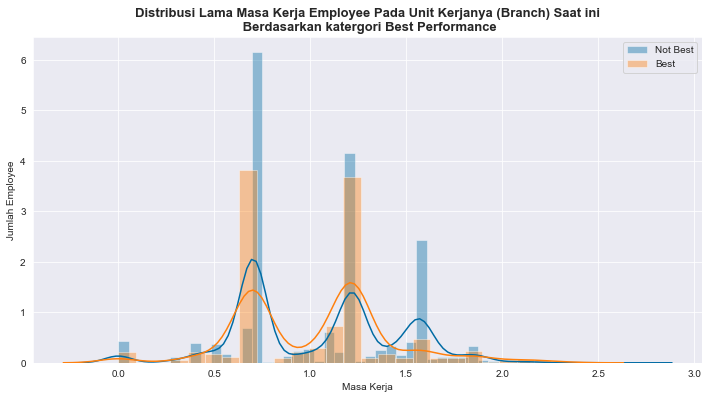

In [30]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Lama Masa Kerja Employee Pada Unit Kerjanya (Branch) Saat ini\n Berdasarkan katergori Best Performance', fontsize=13, fontweight='bold')
sns.distplot(df_train[df_train['Best Performance']==0]['job_duration_in_current_branch'],label='Not Best')
sns.distplot(df_train[df_train['Best Performance']==1]['job_duration_in_current_branch'],label='Best')
plt.xlabel('Masa Kerja')
plt.ylabel('Jumlah Employee')
plt.legend()
plt.show()

### Employee Type

Tipe Pekerja ( 3 tipe Relationship Manager, tipe A, B , dan C)

In [31]:
df_train['Employee_type'].value_counts()

RM_type_A    7286
RM_type_B    3380
RM_type_C     486
Name: Employee_type, dtype: int64

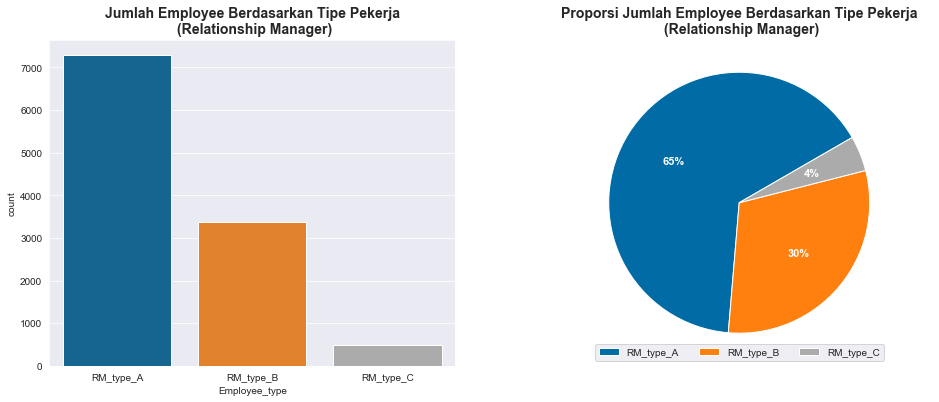

In [32]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Jumlah Employee Berdasarkan Tipe Pekerja\n (Relationship Manager)', fontsize=14, fontweight='bold')
sns.countplot(df_train['Employee_type'].sort_values())
plt.subplot(122)
plt.title('Proporsi Jumlah Employee Berdasarkan Tipe Pekerja\n (Relationship Manager)', fontsize=14, fontweight='bold')
plt.pie(df_train['Employee_type'].value_counts(), autopct='%.0f%%', startangle=30, 
       labels=df_train['Employee_type'].value_counts().index,
       textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
plt.legend(loc='lower center', ncol=4)
plt.show()

In [33]:
RM = df_train['Employee_type'].value_counts().index.sort_values()
RM

Index(['RM_type_A', 'RM_type_B', 'RM_type_C'], dtype='object')

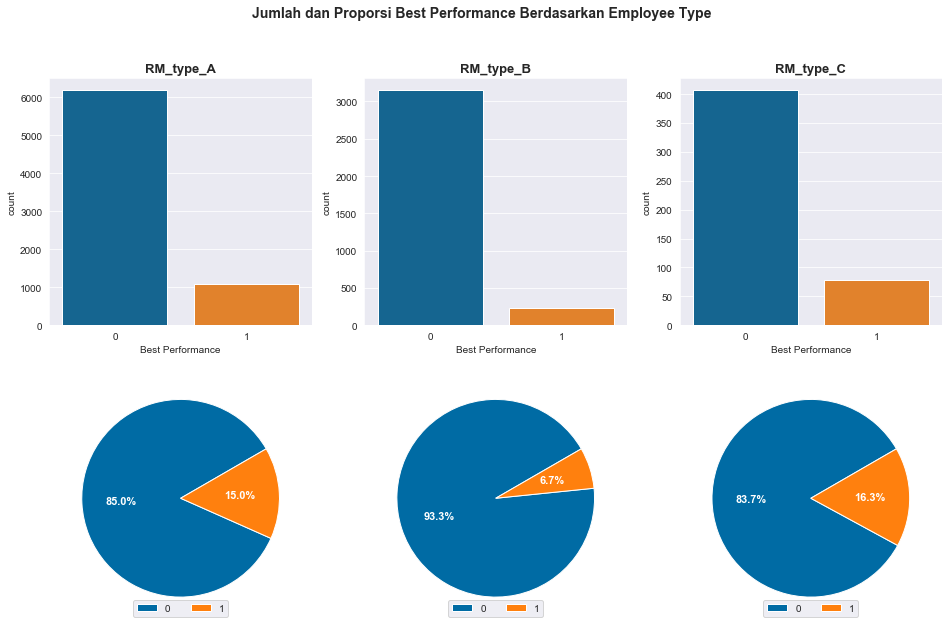

In [34]:
plt.figure(figsize=(16,10))
plt.suptitle('Jumlah dan Proporsi Best Performance Berdasarkan Employee Type', fontsize=14, fontweight='bold')
for i in range(len(RM)):
    plt.subplot(2,3,i+1)
    plt.title(RM[i], fontweight='bold', fontsize=13)
    sns.countplot(df_train[df_train['Employee_type']==RM[i]]['Best Performance'].sort_values())
    plt.subplot(2,3,i+4)
    plt.pie(df_train[df_train['Employee_type']==RM[i]]['Best Performance'].value_counts().sort_index(), 
            autopct='%.1f%%', startangle=30, 
            labels=df_train[df_train['Employee_type']==RM[i]]['Best Performance'].value_counts().index, 
            textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
    plt.legend(loc='lower center', ncol=4)

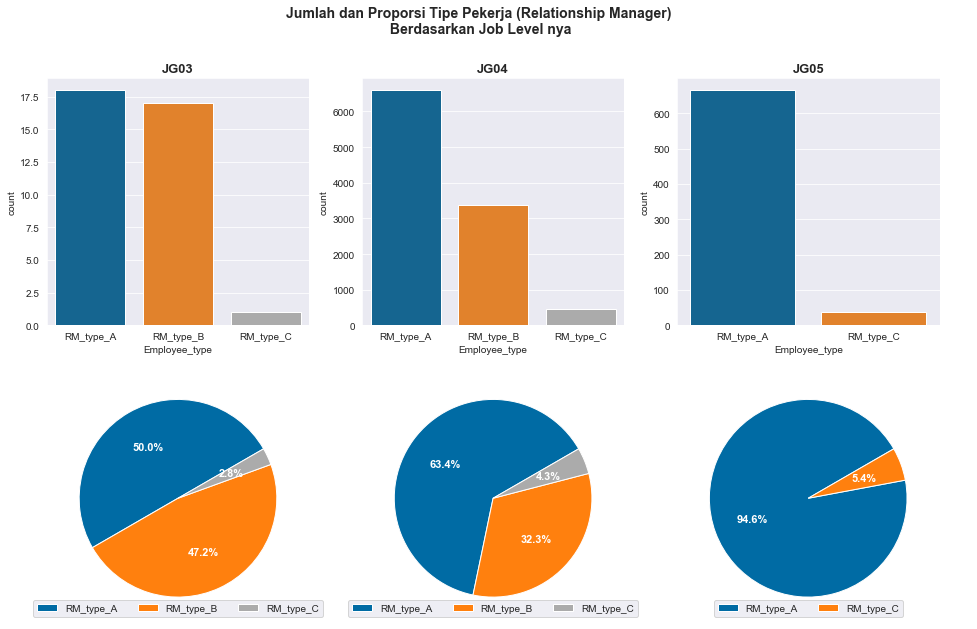

In [35]:
plt.figure(figsize=(16,10))
plt.suptitle('Jumlah dan Proporsi Tipe Pekerja (Relationship Manager)\n Berdasarkan Job Level nya', 
             fontsize=14, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(2,3,i+1)
    plt.title(JG[i], fontweight='bold', fontsize=13)
    sns.countplot(df_train[df_train['job_level']==JG[i]]['Employee_type'].sort_values())
    plt.subplot(2,3,i+4)
    plt.pie(df_train[df_train['job_level']==JG[i]]['Employee_type'].value_counts().sort_index(), 
            autopct='%.1f%%', startangle=30, 
            labels=df_train[df_train['job_level']==JG[i]]['Employee_type'].value_counts().index, 
            textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
    plt.legend(loc='lower center', ncol=4)

### Gender

Jenis Kelamin

In [36]:
df_train['gender'].value_counts()

2    8204
1    2948
Name: gender, dtype: int64

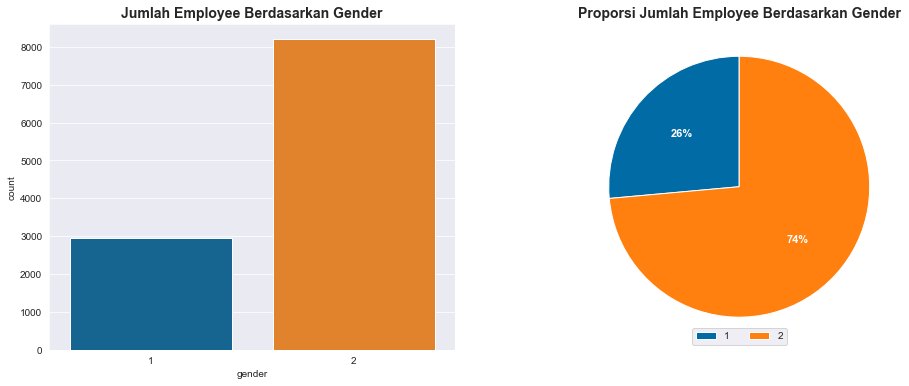

In [37]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Jumlah Employee Berdasarkan Gender', fontsize=14, fontweight='bold')
sns.countplot(df_train['gender'].sort_values())
plt.subplot(122)
plt.title('Proporsi Jumlah Employee Berdasarkan Gender', fontsize=14, fontweight='bold')
plt.pie(df_train['gender'].value_counts().sort_values(), autopct='%.0f%%', startangle=90, 
       labels=df_train['gender'].value_counts().sort_values().index,
       textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
plt.legend(loc='lower center', ncol=4)
plt.show()

In [38]:
GN = df_train['gender'].value_counts().index.sort_values()
GN

Int64Index([1, 2], dtype='int64')

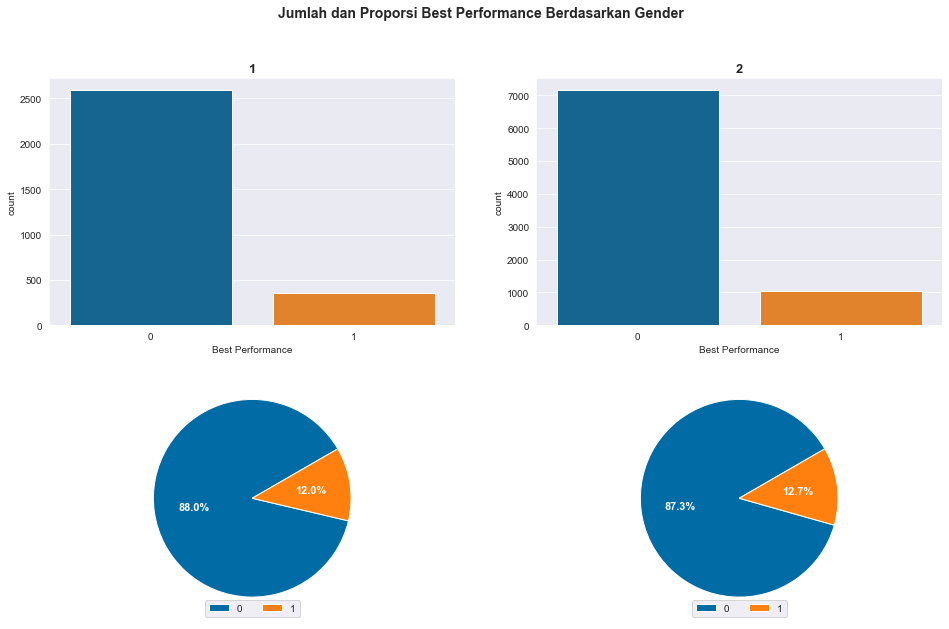

In [39]:
plt.figure(figsize=(16,10))
plt.suptitle('Jumlah dan Proporsi Best Performance Berdasarkan Gender', fontsize=14, fontweight='bold')
for i in range(len(GN)):
    plt.subplot(2,2,i+1)
    plt.title(GN[i], fontweight='bold', fontsize=13)
    sns.countplot(df_train[df_train['gender']==GN[i]]['Best Performance'].sort_values())
    plt.subplot(2,2,i+3)
    plt.pie(df_train[df_train['gender']==GN[i]]['Best Performance'].value_counts().sort_index(), 
            autopct='%.1f%%', startangle=30, 
            labels=df_train[df_train['gender']==GN[i]]['Best Performance'].value_counts().index, 
            textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
    plt.legend(loc='lower center', ncol=4)

### Umur

Usia

In [40]:
df_train['age_now']

0        36
1        32
2        51
3        54
4        56
         ..
11147    35
11148    33
11149    30
11150    34
11151    41
Name: age_now, Length: 11152, dtype: int64

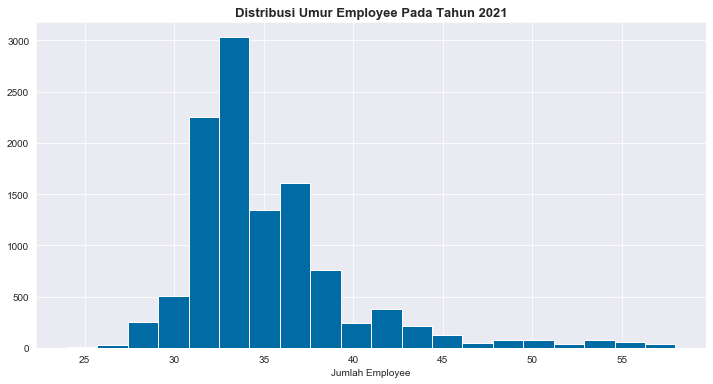

In [41]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Umur Employee Pada Tahun 2021', fontsize=13, fontweight='bold')
df_train['age_now'].hist(bins=20)
plt.xlabel('Umur')
plt.xlabel('Jumlah Employee')
plt.show()

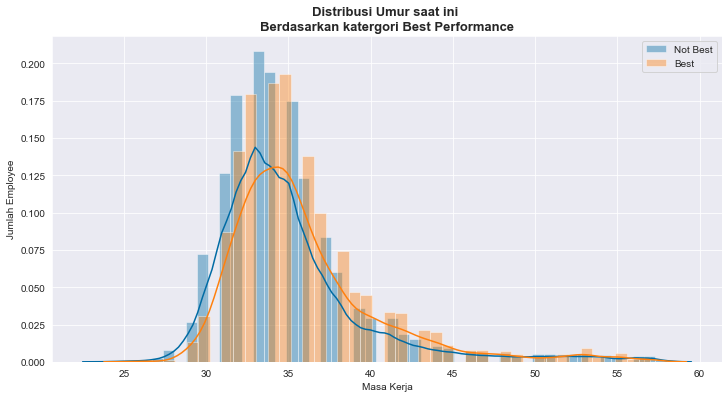

In [42]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Umur saat ini \nBerdasarkan katergori Best Performance', fontsize=13, fontweight='bold')
sns.distplot(df_train[df_train['Best Performance']==0]['age_now'],label='Not Best')
sns.distplot(df_train[df_train['Best Performance']==1]['age_now'],label='Best')
plt.xlabel('Masa Kerja')
plt.ylabel('Jumlah Employee')
plt.legend()
plt.show()

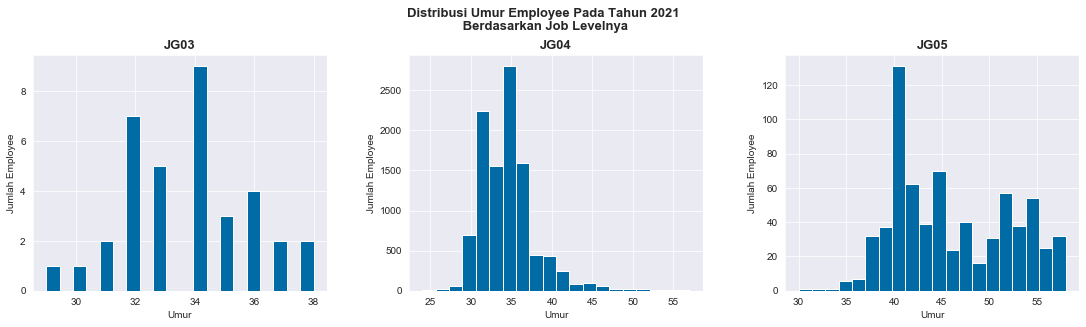

In [43]:
plt.figure(figsize=(16,5))
plt.suptitle('Distribusi Umur Employee Pada Tahun 2021\n Berdasarkan Job Levelnya', fontsize=13, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(1,3,i+1)
    plt.title(JG[i], fontsize=13, fontweight='bold')
    df_train[df_train['job_level']==JG[i]]['age_now'].hist(bins=20)
    plt.xlabel('Umur')
    plt.ylabel('Jumlah Employee')
plt.tight_layout(pad=4)
plt.show()

### marital_status_married(Y/N)

Status Pernikahan (Y / N)

In [44]:
df_train['marital_status_maried(Y/N)'].value_counts()

Y    9501
N    1651
Name: marital_status_maried(Y/N), dtype: int64

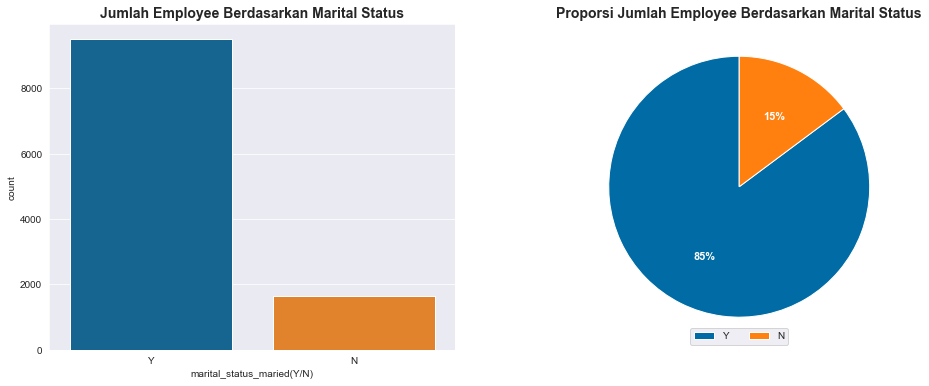

In [45]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Jumlah Employee Berdasarkan Marital Status', fontsize=14, fontweight='bold')
sns.countplot(df_train['marital_status_maried(Y/N)'].sort_values(ascending=False))
plt.subplot(122)
plt.title('Proporsi Jumlah Employee Berdasarkan Marital Status', fontsize=14, fontweight='bold')
plt.pie(df_train['marital_status_maried(Y/N)'].value_counts().sort_values(ascending=False), 
        autopct='%.0f%%', startangle=90, 
       labels=df_train['marital_status_maried(Y/N)'].value_counts().sort_values(ascending=False).index,
       textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
plt.legend(loc='lower center', ncol=4)
plt.show()

In [46]:
MS = df_train['marital_status_maried(Y/N)'].value_counts().index.sort_values()
MS

Index(['N', 'Y'], dtype='object')

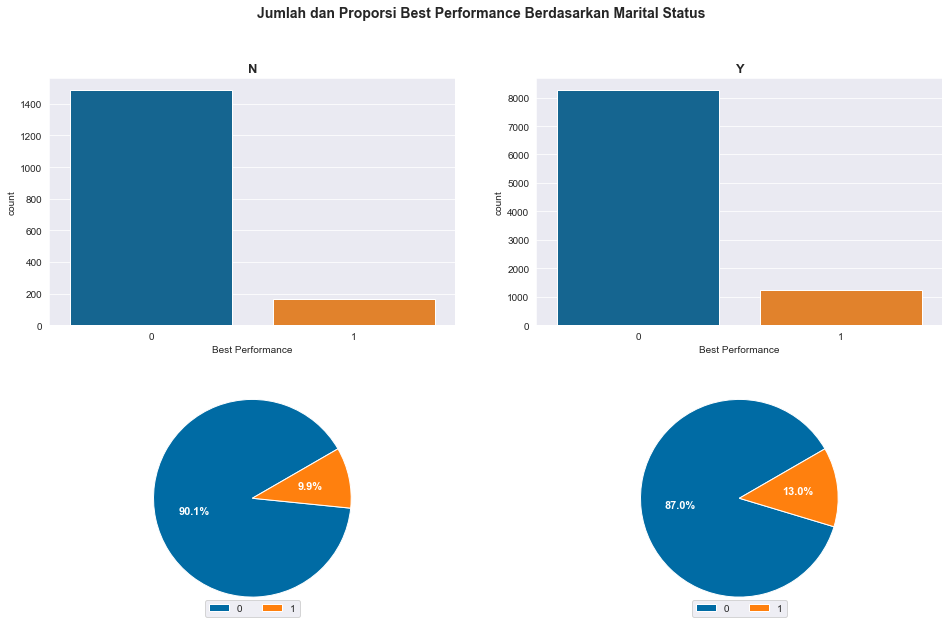

In [47]:
plt.figure(figsize=(16,10))
plt.suptitle('Jumlah dan Proporsi Best Performance Berdasarkan Marital Status', fontsize=14, fontweight='bold')
for i in range(len(MS)):
    plt.subplot(2,2,i+1)
    plt.title(MS[i], fontweight='bold', fontsize=13)
    sns.countplot(df_train[df_train['marital_status_maried(Y/N)']==MS[i]]['Best Performance'].sort_values())
    plt.subplot(2,2,i+3)
    plt.pie(df_train[df_train['marital_status_maried(Y/N)']==MS[i]]['Best Performance'].value_counts().sort_index(), 
            autopct='%.1f%%', startangle=30, 
            labels=df_train[df_train['marital_status_maried(Y/N)']==MS[i]]['Best Performance'].value_counts().index, 
            textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
    plt.legend(loc='lower center', ncol=4)

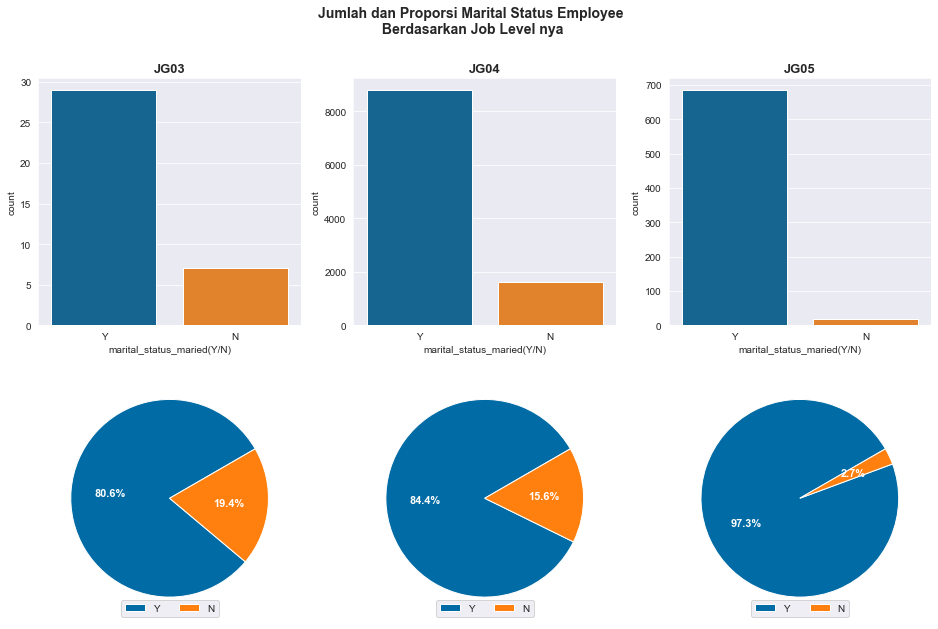

In [48]:
plt.figure(figsize=(16,10))
plt.suptitle('Jumlah dan Proporsi Marital Status Employee\n Berdasarkan Job Level nya', 
             fontsize=14, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(2,3,i+1)
    plt.title(JG[i], fontweight='bold', fontsize=13)
    sns.countplot(df_train[df_train['job_level']==JG[i]]['marital_status_maried(Y/N)'])
    plt.subplot(2,3,i+4)
    plt.pie(df_train[df_train['job_level']==JG[i]]['marital_status_maried(Y/N)'].value_counts(), 
            autopct='%.1f%%', startangle=30, 
            labels=df_train[df_train['job_level']==JG[i]]['marital_status_maried(Y/N)'].value_counts().index, 
            textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
    plt.legend(loc='lower center', ncol=4)

### number_of_dependences

Jumlah anak dalam tanggungan

In [49]:
df_train['number_of_dependences'].value_counts()

1    4185
0    3778
2    2674
3     497
4      13
5       4
7       1
Name: number_of_dependences, dtype: int64

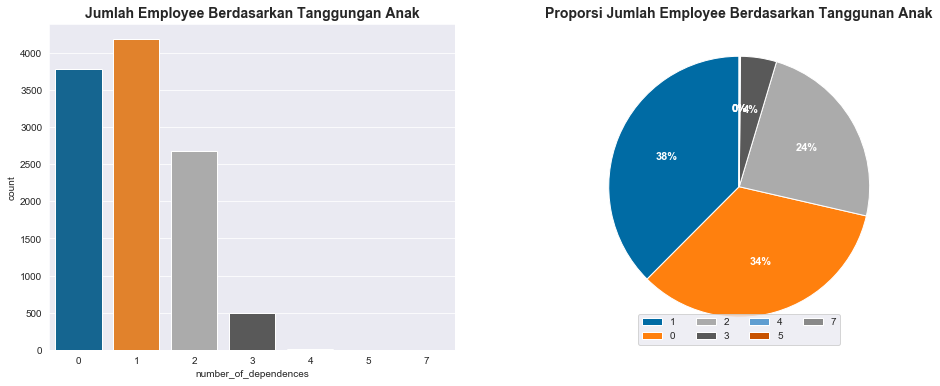

In [50]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Jumlah Employee Berdasarkan Tanggungan Anak', fontsize=14, fontweight='bold')
sns.countplot(df_train['number_of_dependences'].sort_values(ascending=False))
plt.subplot(122)
plt.title('Proporsi Jumlah Employee Berdasarkan Tanggunan Anak', fontsize=14, fontweight='bold')
plt.pie(df_train['number_of_dependences'].value_counts().sort_values(ascending=False), 
        autopct='%.0f%%', startangle=90, 
       labels=df_train['number_of_dependences'].value_counts().sort_values(ascending=False).index,
       textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
plt.legend(loc='lower center', ncol=4)
plt.show()

In [51]:
ND = df_train['number_of_dependences'].value_counts().index.sort_values()
ND

Int64Index([0, 1, 2, 3, 4, 5, 7], dtype='int64')

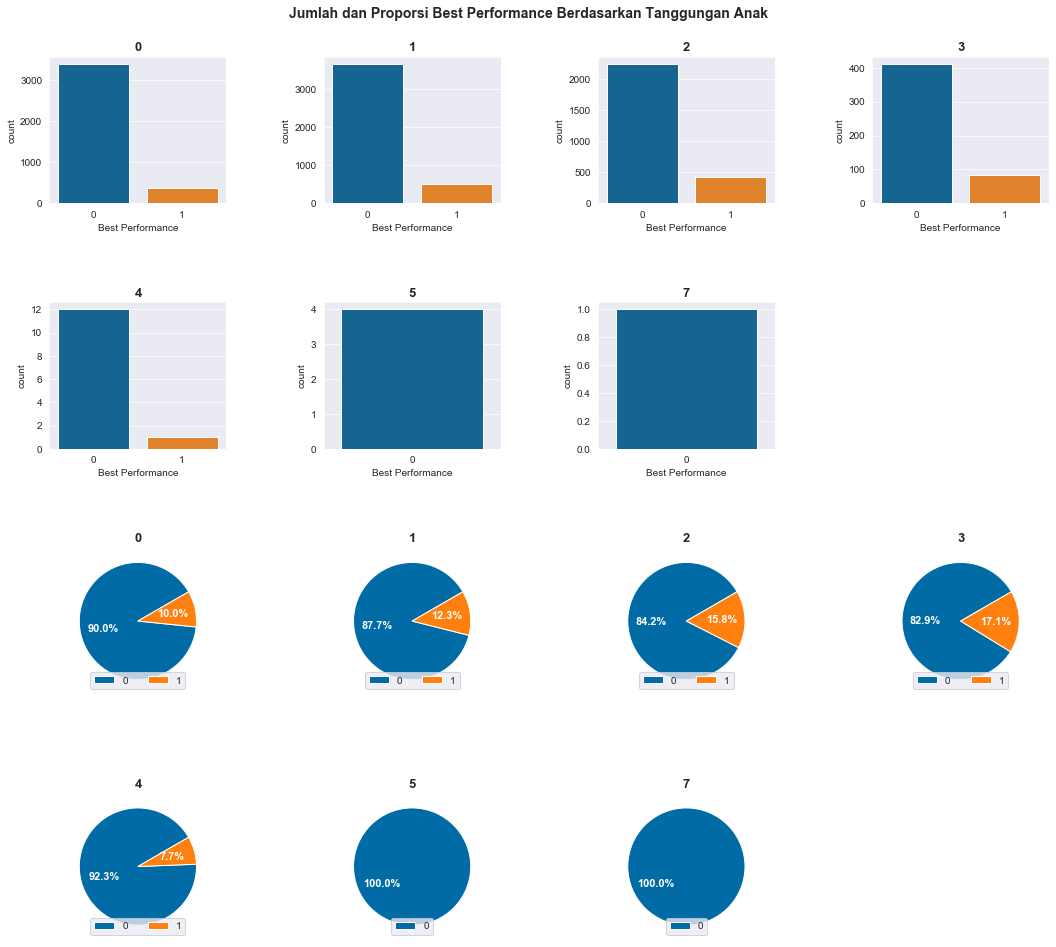

In [52]:
plt.figure(figsize=(16,14))
plt.suptitle('Jumlah dan Proporsi Best Performance Berdasarkan Tanggungan Anak', fontsize=14, fontweight='bold')
for i in range(len(ND)):
    plt.subplot(4,4,i+1)
    plt.title(ND[i], fontweight='bold', fontsize=13)
    sns.countplot(df_train[df_train['number_of_dependences']==ND[i]]['Best Performance'].sort_values())
    plt.subplot(4,4,i+9)
    plt.title(ND[i], fontweight='bold', fontsize=13)
    plt.pie(df_train[df_train['number_of_dependences']==ND[i]]['Best Performance'].value_counts().sort_index(), 
            autopct='%.1f%%', startangle=30, 
            labels=df_train[df_train['number_of_dependences']==ND[i]]['Best Performance'].value_counts().index, 
            textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
    plt.legend(loc='lower center', ncol=4)
plt.tight_layout(pad=5.5)

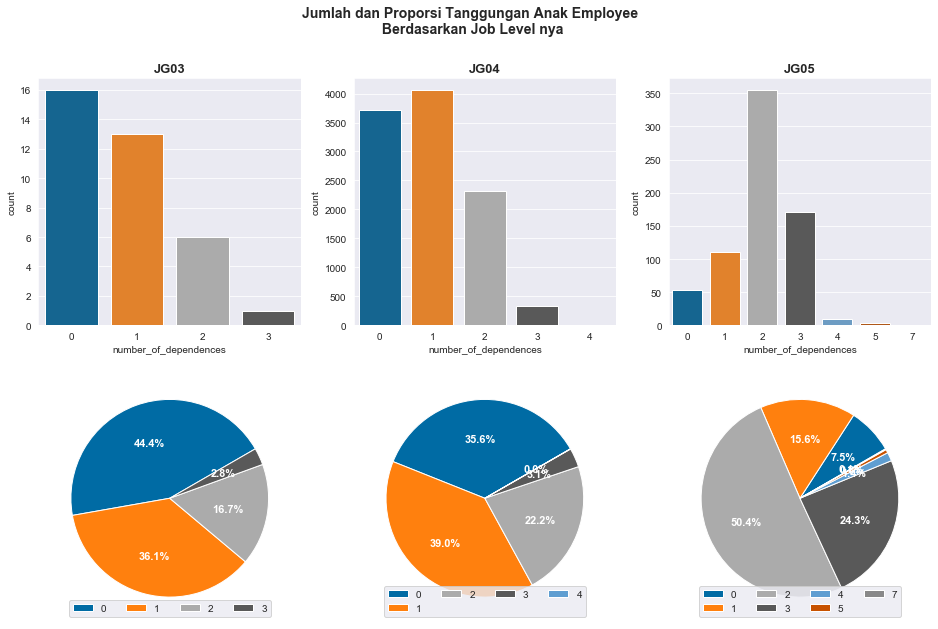

In [53]:
plt.figure(figsize=(16,10))
plt.suptitle('Jumlah dan Proporsi Tanggungan Anak Employee\n Berdasarkan Job Level nya', 
             fontsize=14, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(2,3,i+1)
    plt.title(JG[i], fontweight='bold', fontsize=13)
    sns.countplot(df_train[df_train['job_level']==JG[i]]['number_of_dependences'])
    plt.subplot(2,3,i+4)
    plt.pie(df_train[df_train['job_level']==JG[i]]['number_of_dependences'].value_counts().sort_index(), 
            autopct='%.1f%%', startangle=30, 
            labels=df_train[df_train['job_level']==JG[i]]['number_of_dependences'].value_counts().sort_index().index, 
            textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
    plt.legend(loc='lower center', ncol=4)

### Education_level

Tingkat Pendidikan

In [54]:
df_train['Education_level'].value_counts()

level_4    9222
level_3    1742
level_1     140
level_5      43
level_2       4
level_0       1
Name: Education_level, dtype: int64

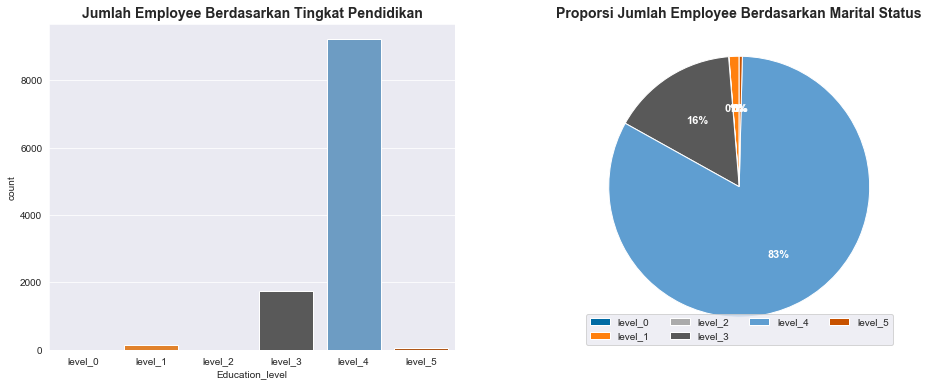

In [55]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Jumlah Employee Berdasarkan Tingkat Pendidikan', fontsize=14, fontweight='bold')
sns.countplot(df_train['Education_level'].sort_index())
plt.subplot(122)
plt.title('Proporsi Jumlah Employee Berdasarkan Marital Status', fontsize=14, fontweight='bold')
plt.pie(df_train['Education_level'].value_counts().sort_index(), 
        autopct='%.0f%%', startangle=90, 
       labels=df_train['Education_level'].value_counts().sort_index().index,
       textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
plt.legend(loc='lower center', ncol=4)
plt.show()

**Hipotesis**

- level_0 : SMA
- level_1 : D1
- level_2 : D2
- level_3 : D3
- level_4 : D4 / S1
- level_5 : S2

In [56]:
ED= df_train['Education_level'].value_counts().index.sort_values()
ED

Index(['level_0', 'level_1', 'level_2', 'level_3', 'level_4', 'level_5'], dtype='object')

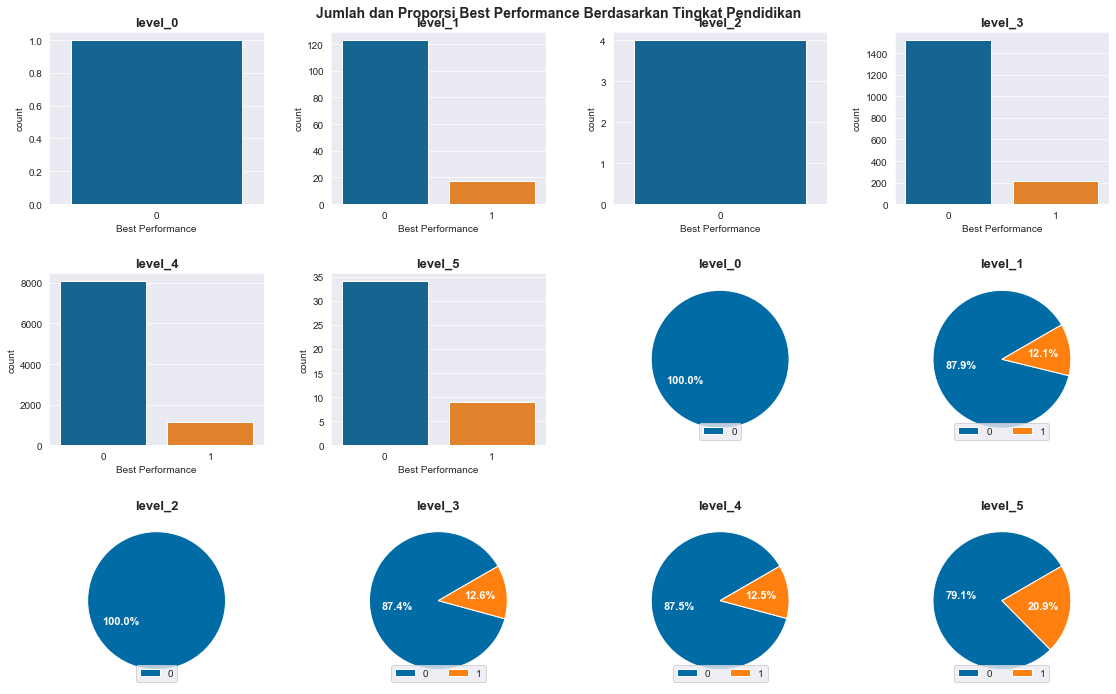

In [57]:
plt.figure(figsize=(16,10))
plt.suptitle('Jumlah dan Proporsi Best Performance Berdasarkan Tingkat Pendidikan', fontsize=14, fontweight='bold')
for i in range(len(ED)):
    plt.subplot(3,4,i+1)
    plt.title(ED[i], fontweight='bold', fontsize=13)
    sns.countplot(df_train[df_train['Education_level']==ED[i]]['Best Performance'].sort_values())
    plt.subplot(3,4,i+7)
    plt.title(ED[i], fontweight='bold', fontsize=13)
    plt.pie(df_train[df_train['Education_level']==ED[i]]['Best Performance'].value_counts().sort_index(), 
            autopct='%.1f%%', startangle=30, 
            labels=df_train[df_train['Education_level']==ED[i]]['Best Performance'].value_counts().index, 
            textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
    plt.legend(loc='lower center', ncol=4)
plt.tight_layout(pad=2.5)

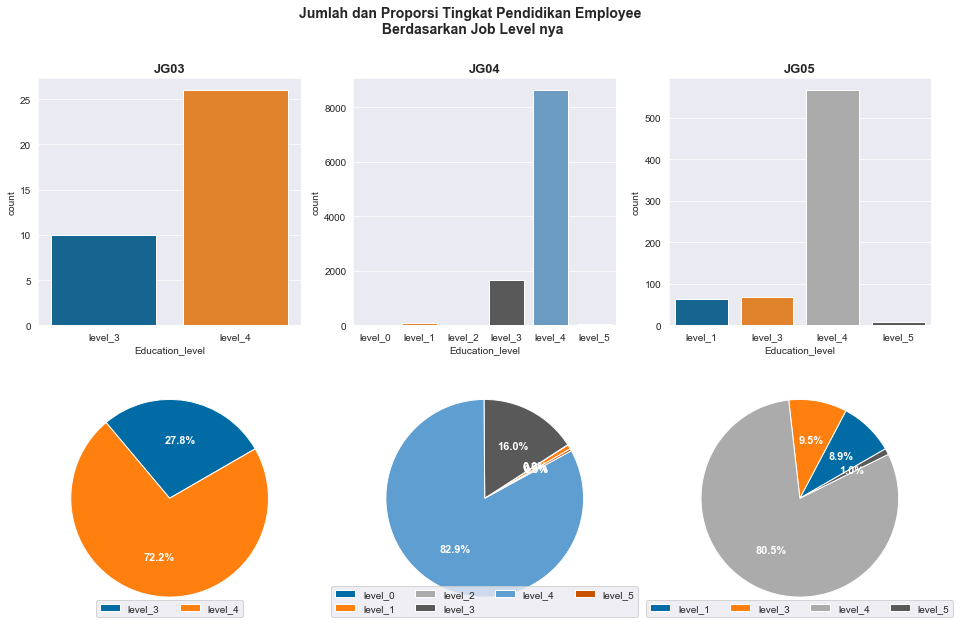

In [58]:
plt.figure(figsize=(16,10))
plt.suptitle('Jumlah dan Proporsi Tingkat Pendidikan Employee\n Berdasarkan Job Level nya', 
             fontsize=14, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(2,3,i+1)
    plt.title(JG[i], fontweight='bold', fontsize=13)
    sns.countplot(df_train[df_train['job_level']==JG[i]]['Education_level'])
    plt.subplot(2,3,i+4)
    plt.pie(df_train[df_train['job_level']==JG[i]]['Education_level'].value_counts().sort_index(), 
            autopct='%.1f%%', startangle=30, 
            labels=df_train[df_train['job_level']==JG[i]]['Education_level'].value_counts().sort_index().index, 
            textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
    plt.legend(loc='lower center', ncol=4)

### GPA

IPK

In [59]:
df_train['GPA'].value_counts()

3.14    2184
3.00     382
3.11     354
3.01     229
3.10     199
        ... 
2.37       1
2.05       1
2.10       1
2.52       1
2.09       1
Name: GPA, Length: 163, dtype: int64

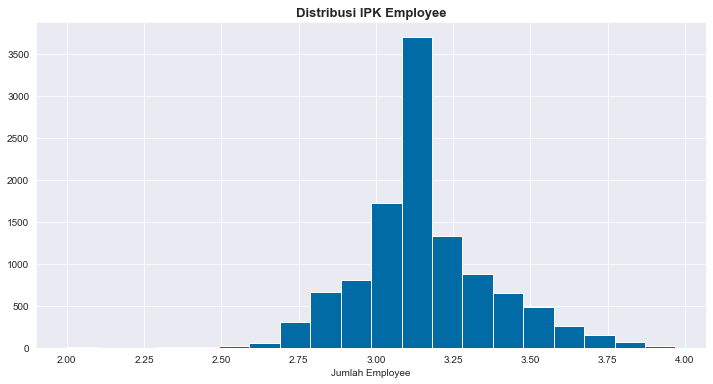

In [60]:
plt.figure(figsize=(12,6))
plt.title('Distribusi IPK Employee', fontsize=13, fontweight='bold')
df_train['GPA'].hist(bins=20)
plt.xlabel('IPK')
plt.xlabel('Jumlah Employee')
plt.show()

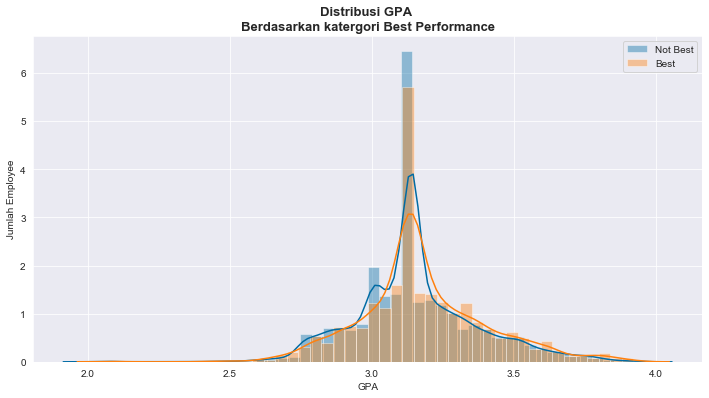

In [61]:
plt.figure(figsize=(12,6))
plt.title('Distribusi GPA \nBerdasarkan katergori Best Performance', fontsize=13, fontweight='bold')
sns.distplot(df_train[df_train['Best Performance']==0]['GPA'],label='Not Best')
sns.distplot(df_train[df_train['Best Performance']==1]['GPA'],label='Best')
plt.xlabel('GPA')
plt.ylabel('Jumlah Employee')
plt.legend()
plt.show()

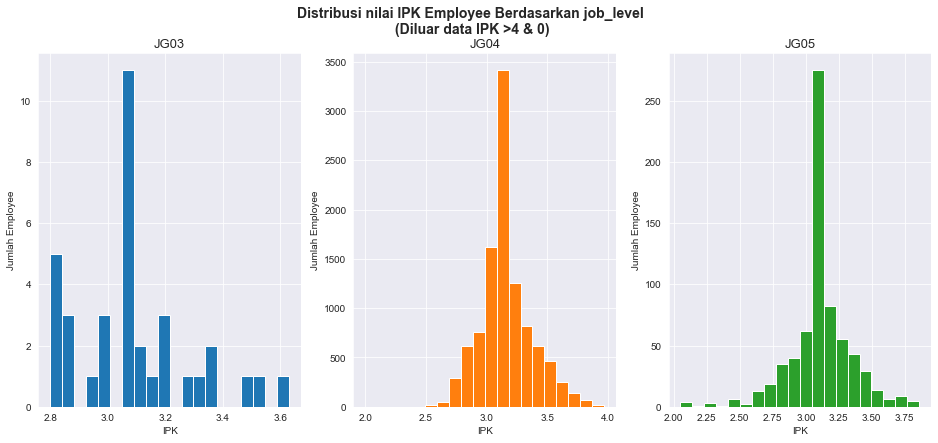

In [63]:
plt.figure(figsize=(16,6.5))
plt.suptitle('Distribusi nilai IPK Employee Berdasarkan job_level\n (Diluar data IPK >4 & 0)', fontsize=14, fontweight='bold')
for x in range(len(JG)) :
    plt.subplot(1,3,x+1)
    plt.title('JG0'+str(3+x), fontsize=13)
    df_train[df_train['job_level']==JG[x]]['GPA'].hist(bins=20, color=color[x])
    plt.xlabel('IPK')
    plt.ylabel('Jumlah Employee')

### Job Duration From Training

Lama bekerja mulai dari training

In [64]:
df_train['job_duration_from_training']

0         4
1         4
2        28
3        29
4        30
         ..
11147     4
11148     3
11149     2
11150     5
11151    14
Name: job_duration_from_training, Length: 11152, dtype: int64

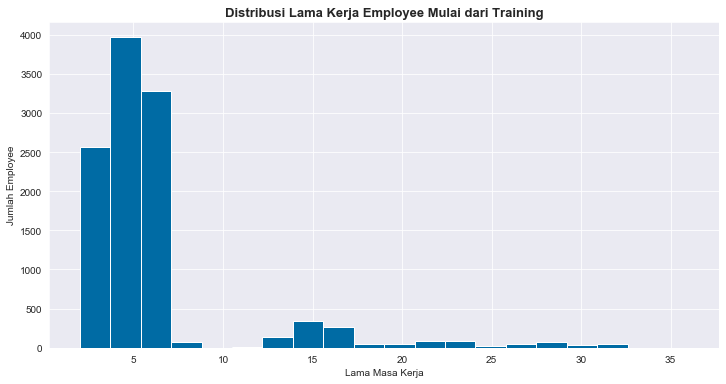

In [65]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Lama Kerja Employee Mulai dari Training', fontsize=13, fontweight='bold')
df_train['job_duration_from_training'].hist(bins=20)
plt.xlabel('Lama Masa Kerja')
plt.ylabel('Jumlah Employee')
plt.show()

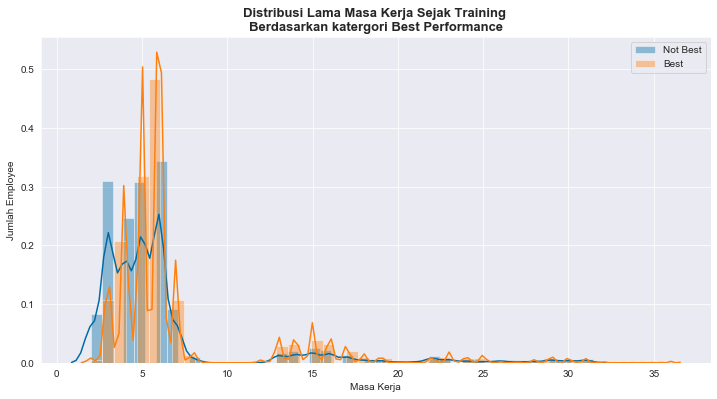

In [66]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Lama Masa Kerja Sejak Training \nBerdasarkan katergori Best Performance', fontsize=13, fontweight='bold')
sns.distplot(df_train[df_train['Best Performance']==0]['job_duration_from_training'],label='Not Best')
sns.distplot(df_train[df_train['Best Performance']==1]['job_duration_from_training'],label='Best')
plt.xlabel('Masa Kerja')
plt.ylabel('Jumlah Employee')
plt.legend()
plt.show()

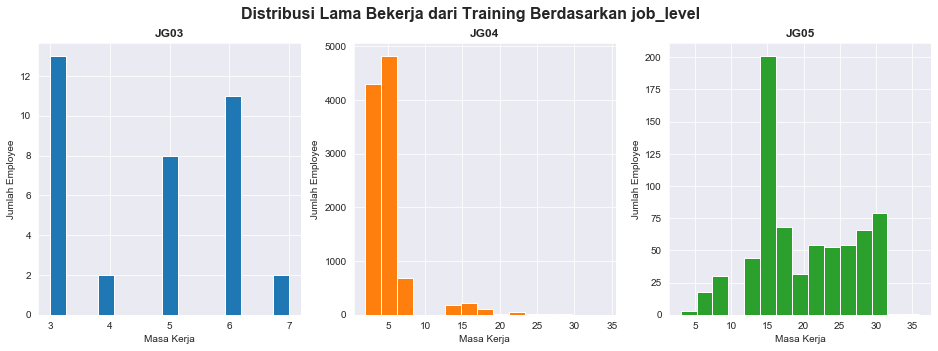

In [67]:
plt.figure(figsize=(16,5))
plt.suptitle('Distribusi Lama Bekerja dari Training Berdasarkan job_level', fontsize=16, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(1,3,i+1)
    plt.title(JG[i], fontweight='bold')
    df_train[df_train['job_level']==JG[i]]['job_duration_from_training'].hist(bins=15,color=color[i])
    plt.xlabel('Masa Kerja')
    plt.ylabel('Jumlah Employee')
plt.show()

### Branch Rotation

Jumlah rotasi pindah unit kerja

In [68]:
df_train['branch_rotation'].value_counts().sort_index()

1      417
2     3271
3     3404
4     1808
5      729
6      311
7      228
8      217
9      220
10     198
11     141
12      96
13      54
14      24
15      17
16      11
17       4
19       1
22       1
Name: branch_rotation, dtype: int64

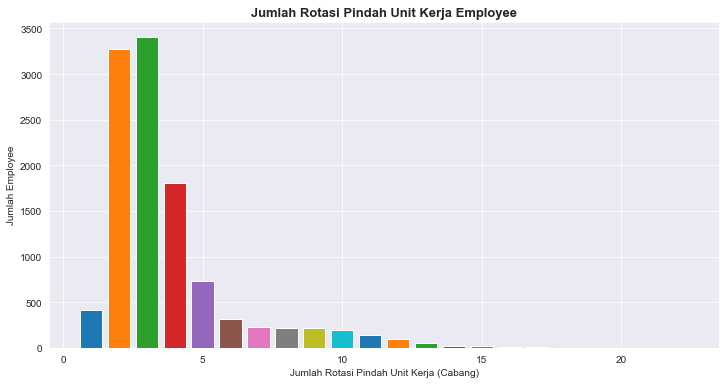

In [69]:
plt.figure(figsize=(12,6))
plt.title('Jumlah Rotasi Pindah Unit Kerja Employee', fontsize=13, fontweight='bold')
plt.bar(df_train['branch_rotation'].value_counts().sort_index().index, 
        df_train['branch_rotation'].value_counts().sort_index().values,
       color=color)
plt.xlabel('Jumlah Rotasi Pindah Unit Kerja (Cabang)')
plt.ylabel('Jumlah Employee')
plt.show()

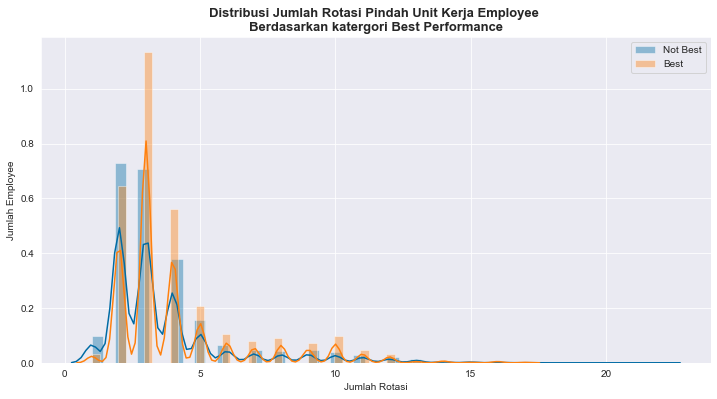

In [70]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Jumlah Rotasi Pindah Unit Kerja Employee \nBerdasarkan katergori Best Performance', fontsize=13, fontweight='bold')
sns.distplot(df_train[df_train['Best Performance']==0]['branch_rotation'],label='Not Best')
sns.distplot(df_train[df_train['Best Performance']==1]['branch_rotation'],label='Best')
plt.xlabel('Jumlah Rotasi')
plt.ylabel('Jumlah Employee')
plt.legend()
plt.show()

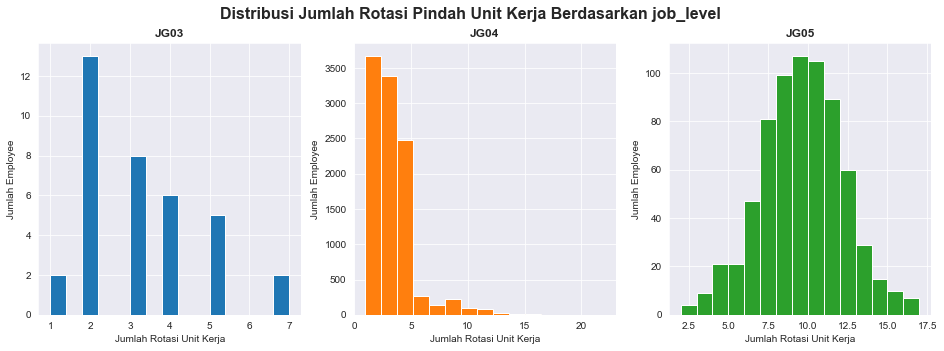

In [71]:
plt.figure(figsize=(16,5))
plt.suptitle('Distribusi Jumlah Rotasi Pindah Unit Kerja Berdasarkan job_level', fontsize=16, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(1,3,i+1)
    plt.title(JG[i], fontweight='bold')
    df_train[df_train['job_level']==JG[i]]['branch_rotation'].hist(bins=15,color=color[i])
    plt.xlabel('Jumlah Rotasi Unit Kerja')
    plt.ylabel('Jumlah Employee')
plt.show()

### Job Rotation

Jumlah rotasi pindah jabatan

In [72]:
df_train['job_rotation'].value_counts().sort_index()

1       21
2     3656
3     3621
4     1858
5      689
6      349
7      317
8      295
9      201
10      88
11      34
12      17
13       4
14       1
15       1
Name: job_rotation, dtype: int64

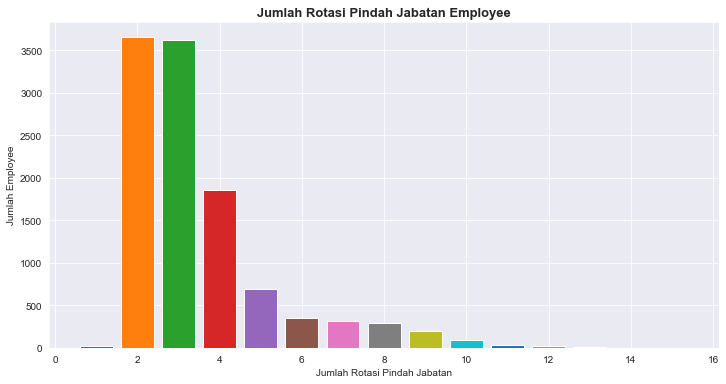

In [73]:
plt.figure(figsize=(12,6))
plt.title('Jumlah Rotasi Pindah Jabatan Employee', fontsize=13, fontweight='bold')
plt.bar(df_train['job_rotation'].value_counts().sort_index().index, 
        df_train['job_rotation'].value_counts().sort_index().values,
       color=color)
plt.xlabel('Jumlah Rotasi Pindah Jabatan')
plt.ylabel('Jumlah Employee')
plt.show()

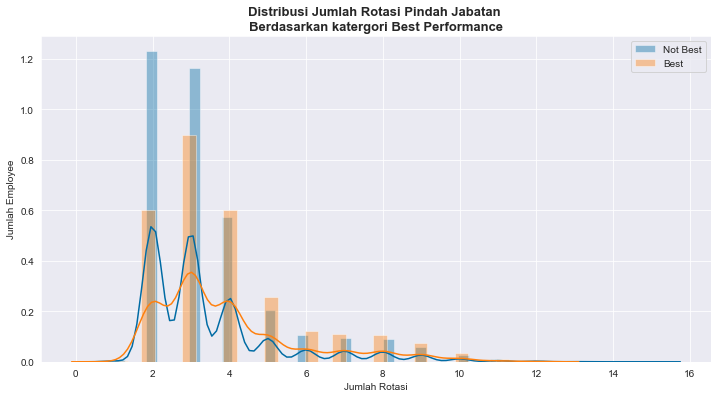

In [74]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Jumlah Rotasi Pindah Jabatan \nBerdasarkan katergori Best Performance', fontsize=13, fontweight='bold')
sns.distplot(df_train[df_train['Best Performance']==0]['job_rotation'],label='Not Best')
sns.distplot(df_train[df_train['Best Performance']==1]['job_rotation'],label='Best')
plt.xlabel('Jumlah Rotasi')
plt.ylabel('Jumlah Employee')
plt.legend()
plt.show()

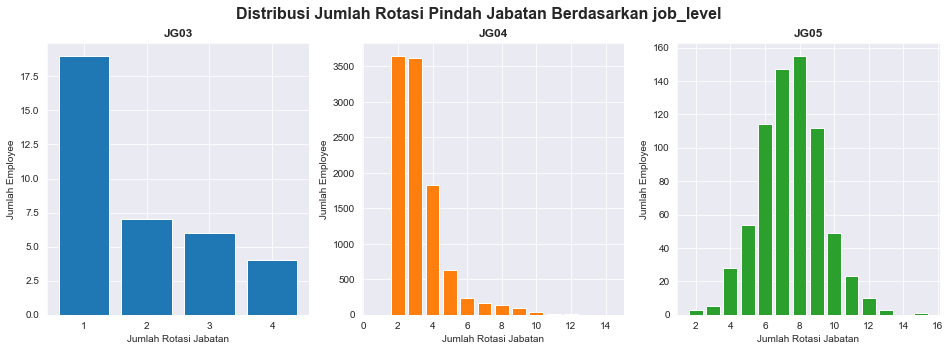

In [75]:
plt.figure(figsize=(16,5))
plt.suptitle('Distribusi Jumlah Rotasi Pindah Jabatan Berdasarkan job_level', fontsize=16, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(1,3,i+1)
    plt.title(JG[i], fontweight='bold')
    plt.bar(df_train[df_train['job_level']==JG[i]]['job_rotation'].value_counts().index,
            df_train[df_train['job_level']==JG[i]]['job_rotation'].value_counts().values,color=color[i])
    plt.xlabel('Jumlah Rotasi Jabatan')
    plt.ylabel('Jumlah Employee')
plt.show()

### Assign Other Position

Jumlah rotasi penugasan

In [76]:
df_train['assign_of_otherposition'].value_counts().sort_index()

0     7302
1     1385
2      684
3      476
4      309
5      250
6      190
7      145
8      102
9       82
10      47
11      47
12      25
13      17
14      22
15      16
16      13
17      12
18       7
19       8
20       3
21       2
22       5
24       1
27       1
29       1
Name: assign_of_otherposition, dtype: int64

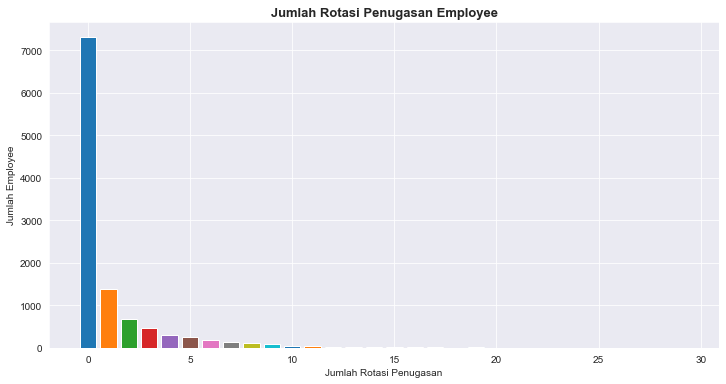

In [77]:
plt.figure(figsize=(12,6))
plt.title('Jumlah Rotasi Penugasan Employee', fontsize=13, fontweight='bold')
plt.bar(df_train['assign_of_otherposition'].value_counts().sort_index().index, 
        df_train['assign_of_otherposition'].value_counts().sort_index().values,
       color=color)
plt.xlabel('Jumlah Rotasi Penugasan')
plt.ylabel('Jumlah Employee')
plt.show()

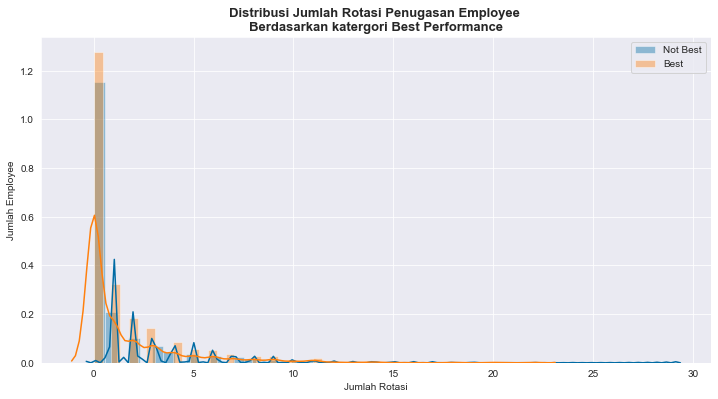

In [78]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Jumlah Rotasi Penugasan Employee \nBerdasarkan katergori Best Performance', fontsize=13, fontweight='bold')
sns.distplot(df_train[df_train['Best Performance']==0]['assign_of_otherposition'],label='Not Best')
sns.distplot(df_train[df_train['Best Performance']==1]['assign_of_otherposition'],label='Best')
plt.xlabel('Jumlah Rotasi')
plt.ylabel('Jumlah Employee')
plt.legend()
plt.show()

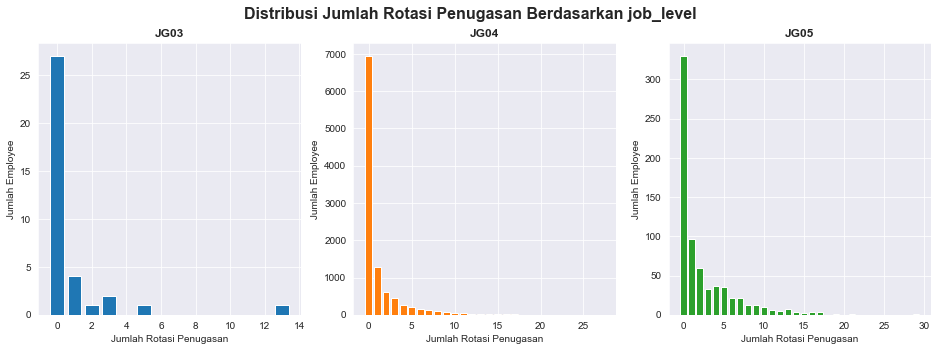

In [79]:
plt.figure(figsize=(16,5))
plt.suptitle('Distribusi Jumlah Rotasi Penugasan Berdasarkan job_level', fontsize=16, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(1,3,i+1)
    plt.title(JG[i], fontweight='bold')
    plt.bar(df_train[df_train['job_level']==JG[i]]['assign_of_otherposition'].value_counts().index,
            df_train[df_train['job_level']==JG[i]]['assign_of_otherposition'].value_counts().values,color=color[i])
    plt.xlabel('Jumlah Rotasi Penugasan')
    plt.ylabel('Jumlah Employee')
plt.show()

### Annual Leave

Jumlah Cuti Tahunan

In [80]:
df_train['annual leave'].value_counts().sort_index()

0     1447
1      704
2     1497
3     2698
4     1154
5     1333
6      847
7      479
8      405
9      240
10     146
11      77
12      64
13      25
14      14
15      10
16       5
18       4
19       1
20       1
21       1
Name: annual leave, dtype: int64

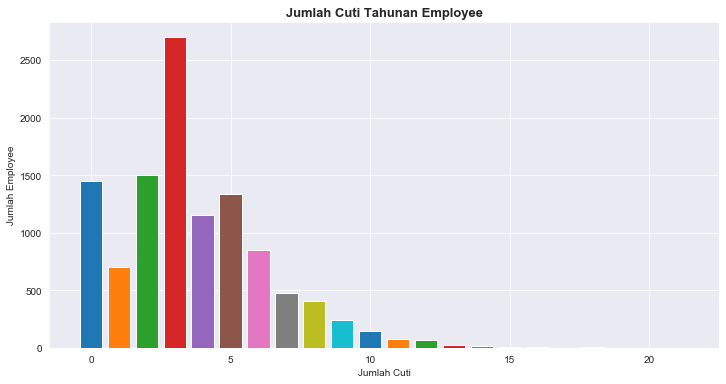

In [81]:
plt.figure(figsize=(12,6))
plt.title('Jumlah Cuti Tahunan Employee', fontsize=13, fontweight='bold')
plt.bar(df_train['annual leave'].value_counts().sort_index().index, 
        df_train['annual leave'].value_counts().sort_index().values,
       color=color)
plt.xlabel('Jumlah Cuti')
plt.ylabel('Jumlah Employee')
plt.show()

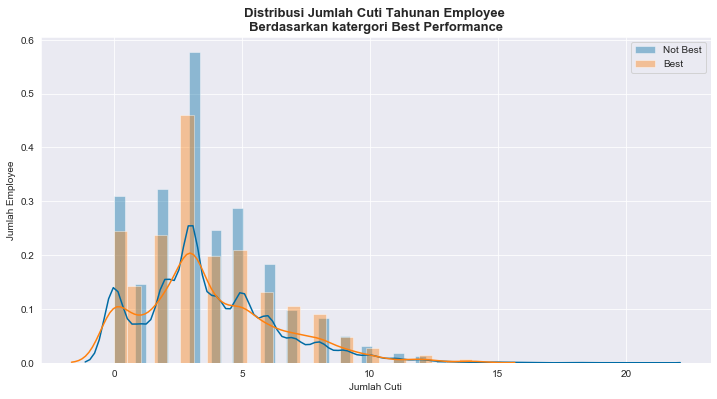

In [82]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Jumlah Cuti Tahunan Employee \nBerdasarkan katergori Best Performance', fontsize=13, fontweight='bold')
sns.distplot(df_train[df_train['Best Performance']==0]['annual leave'],label='Not Best')
sns.distplot(df_train[df_train['Best Performance']==1]['annual leave'],label='Best')
plt.xlabel('Jumlah Cuti')
plt.ylabel('Jumlah Employee')
plt.legend()
plt.show()

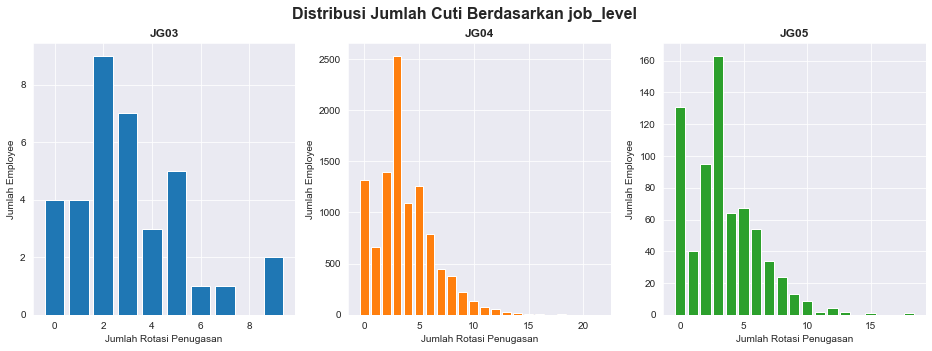

In [83]:
plt.figure(figsize=(16,5))
plt.suptitle('Distribusi Jumlah Cuti Berdasarkan job_level', fontsize=16, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(1,3,i+1)
    plt.title(JG[i], fontweight='bold')
    plt.bar(df_train[df_train['job_level']==JG[i]]['annual leave'].value_counts().index,
            df_train[df_train['job_level']==JG[i]]['annual leave'].value_counts().values,color=color[i])
    plt.xlabel('Jumlah Rotasi Penugasan')
    plt.ylabel('Jumlah Employee')
plt.show()

### Sick Leaves

Jumlah Izin Sakit

In [84]:
df_train['sick_leaves']

0         0
1         1
2         1
3        10
4         0
         ..
11147     1
11148     0
11149     0
11150     1
11151     0
Name: sick_leaves, Length: 11152, dtype: int64

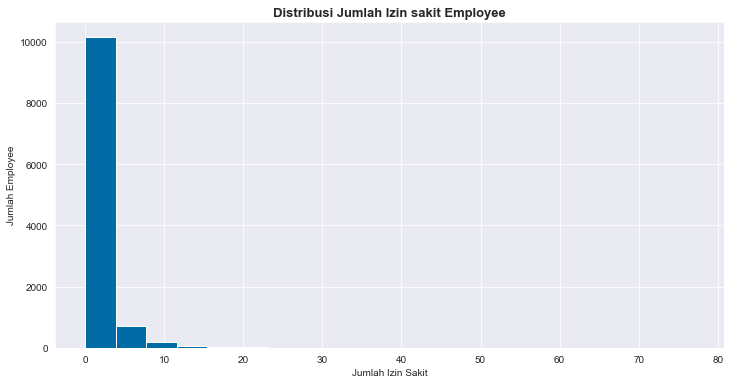

In [85]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Jumlah Izin sakit Employee', fontsize=13, fontweight='bold')
df_train['sick_leaves'].hist(bins=20)
plt.xlabel('Jumlah Izin Sakit')
plt.ylabel('Jumlah Employee')
plt.show()

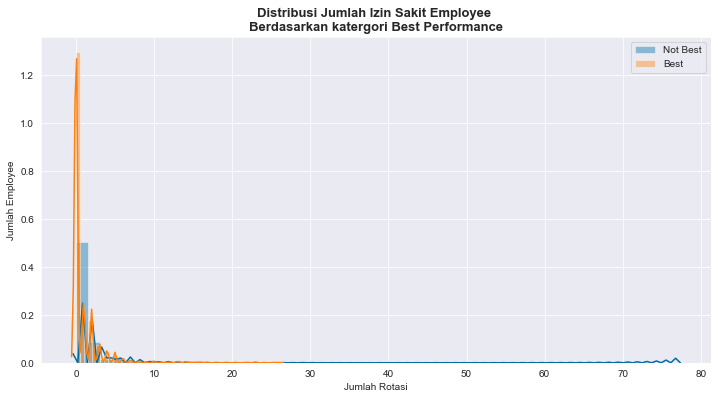

In [86]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Jumlah Izin Sakit Employee \nBerdasarkan katergori Best Performance', fontsize=13, fontweight='bold')
sns.distplot(df_train[df_train['Best Performance']==0]['sick_leaves'],label='Not Best')
sns.distplot(df_train[df_train['Best Performance']==1]['sick_leaves'],label='Best')
plt.xlabel('Jumlah Rotasi')
plt.ylabel('Jumlah Employee')
plt.legend()
plt.show()

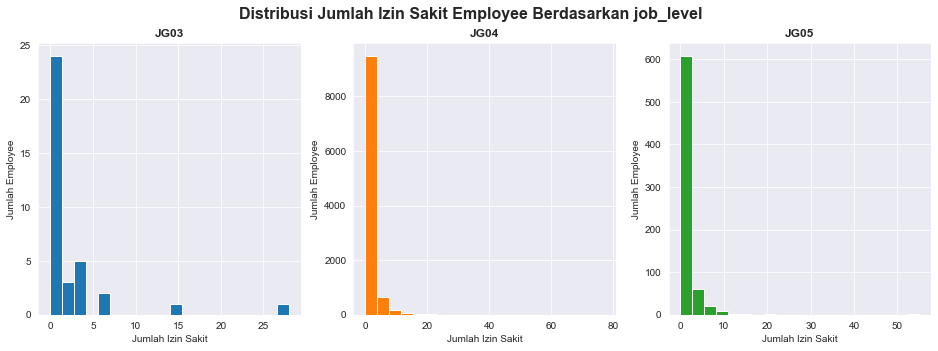

In [87]:
plt.figure(figsize=(16,5))
plt.suptitle('Distribusi Jumlah Izin Sakit Employee Berdasarkan job_level', fontsize=16, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(1,3,i+1)
    plt.title(JG[i], fontweight='bold')
    df_train[df_train['job_level']==JG[i]]['sick_leaves'].hist(bins=20,color=color[i])
    plt.xlabel('Jumlah Izin Sakit')
    plt.ylabel('Jumlah Employee')
plt.show()

### Last Achievement

Presentase pencapaian triwulan terakhir terhadap target

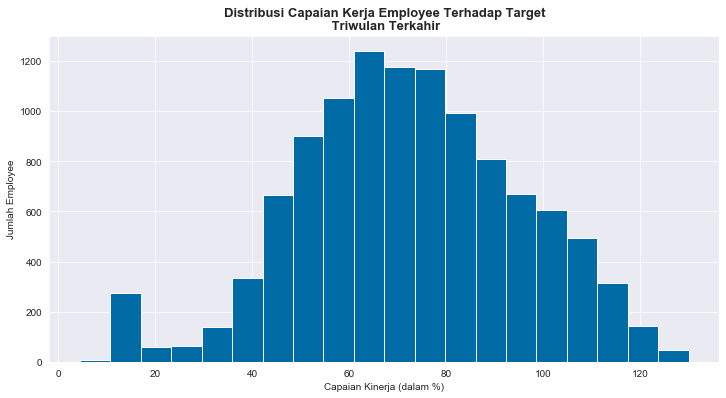

In [88]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Capaian Kerja Employee Terhadap Target\n Triwulan Terkahir', fontsize=13, fontweight='bold')
df_train['Last_achievement_%'].hist(bins=20)
plt.xlabel('Capaian Kinerja (dalam %)')
plt.ylabel('Jumlah Employee')
plt.show()

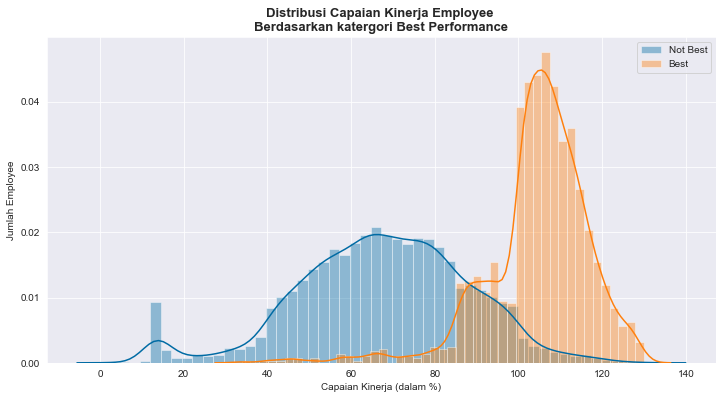

In [89]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Capaian Kinerja Employee \nBerdasarkan katergori Best Performance', fontsize=13, fontweight='bold')
sns.distplot(df_train[df_train['Best Performance']==0]['Last_achievement_%'],label='Not Best')
sns.distplot(df_train[df_train['Best Performance']==1]['Last_achievement_%'],label='Best')
plt.xlabel('Capaian Kinerja (dalam %)')
plt.ylabel('Jumlah Employee')
plt.legend()
plt.show()

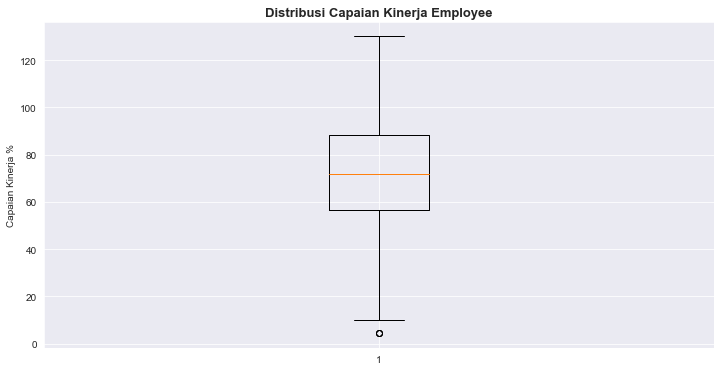

In [90]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Capaian Kinerja Employee', fontsize=13, fontweight='bold')
plt.boxplot(df_train['Last_achievement_%'])
plt.ylabel('Capaian Kinerja %')
plt.show()
plt.show()

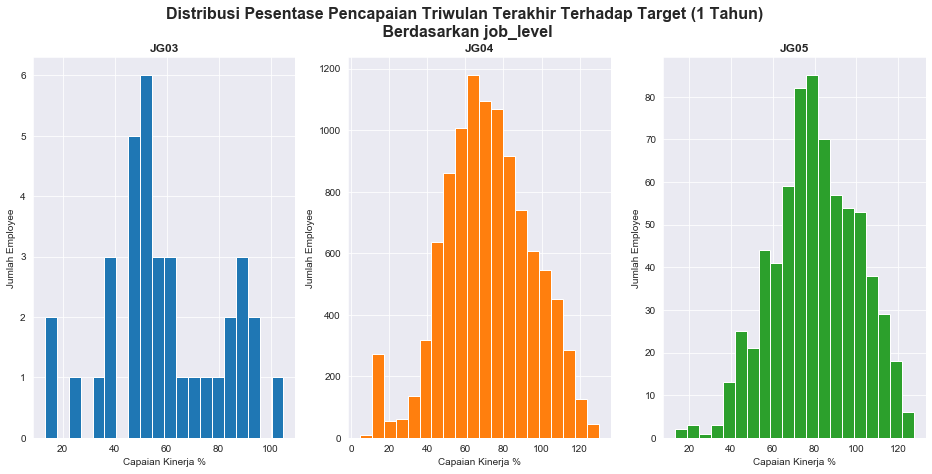

In [91]:
plt.figure(figsize=(16,7))
plt.suptitle('Distribusi Pesentase Pencapaian Triwulan Terakhir Terhadap Target (1 Tahun)\n Berdasarkan job_level', fontsize=16, fontweight='bold')
for i in range(len(JG)) :
    plt.subplot(1,3,i+1)
    plt.title(JG[i], fontweight='bold')
    df_train[df_train['job_level']==JG[i]]['Last_achievement_%'].hist(bins=20,color=color[i])
    plt.xlabel('Capaian Kinerja %')
    plt.ylabel('Jumlah Employee')

Employee Dengan Capaian **Kinerja 100%**

In [92]:
employee_100 = df_train[df_train['Last_achievement_%']==100.00]
employee_100

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated


Employee Dengan Capaian **Kinerja diatas 100 %**

In [93]:
employee_above_100 = df_train[df_train['Last_achievement_%']>100]
employee_above_100['Last_achievement_%'].describe()

count    1452.000000
mean      109.280200
std         6.731869
min       100.010000
25%       103.827500
50%       108.070000
75%       113.545000
max       130.000000
Name: Last_achievement_%, dtype: float64

In [94]:
print(f'Jumlah Employee dengan kinerja diatas 100% berjumlah {len(employee_above_100)} orang dari total {len(df_train)} jumlah employee')
print(f'Presentase Jumlah Employee dengan capaian Kinerja diatas 100% : {round((len(employee_above_100)/len(df_train)*100),2)}%' )

Jumlah Employee dengan kinerja diatas 100% berjumlah 1452 orang dari total 11152 jumlah employee
Presentase Jumlah Employee dengan capaian Kinerja diatas 100% : 13.02%


In [95]:
#Employee dengan capaian kinerja tertingi
employee_above_100[employee_above_100['Last_achievement_%']==130.00].T

,3277,3315
job_level,JG04,JG04
job_duration_in_current_job_level,1.60624,1.65831
person_level,PG03,PG04
job_duration_in_current_person_level,1.60624,0.707107
job_duration_in_current_branch,0.707107,0.707107
Employee_type,RM_type_A,RM_type_A
gender,2,2
marital_status_maried(Y/N),N,Y
number_of_dependences,0,0
Education_level,level_4,level_4


In [96]:
employee_above_100['job_level'].value_counts()

JG04    1318
JG05     133
JG03       1
Name: job_level, dtype: int64

In [97]:
employee_above_100['job_duration_from_training'].value_counts().sort_values()

36      1
31      1
26      2
29      3
28      3
24      3
12      3
30      4
19      6
25      7
22      8
18     10
23     11
8      12
2      12
17     16
13     31
16     33
14     35
15     38
7     115
3     136
4     205
5     322
6     435
Name: job_duration_from_training, dtype: int64

Employee dengan **kinerja 80 - 99 %**

In [98]:
employee_80_99 = df_train[(df_train['Last_achievement_%']>=80) & (df_train['Last_achievement_%']<100)]

In [99]:
employee_80_99['Last_achievement_%'].describe()

count    2579.000000
mean       89.038104
std         5.778952
min        80.000000
25%        83.920000
50%        88.520000
75%        93.820000
max        99.990000
Name: Last_achievement_%, dtype: float64

In [100]:
print(f'Jumlah Employee dengan kinerja 80-99% berjumlah {len(employee_80_99)} orang dari total {len(df_train)} jumlah employee')
print(f'Presentase Jumlah Employee dengan capaian Kinerja 80-99% : {round((len(employee_80_99)/len(df_train)*100),2)}%' )

Jumlah Employee dengan kinerja 80-99% berjumlah 2579 orang dari total 11152 jumlah employee
Presentase Jumlah Employee dengan capaian Kinerja 80-99% : 23.13%


In [101]:
employee_80_99['job_level'].value_counts()

JG04    2358
JG05     213
JG03       8
Name: job_level, dtype: int64

Employee dengan **kinerja 60 - 79 %**

In [102]:
employee_60_79 = df_train[(df_train['Last_achievement_%']>=60) & (df_train['Last_achievement_%']<80)]

In [103]:
employee_60_79['Last_achievement_%'].describe()

count    3796.000000
mean       69.935951
std         5.761873
min        60.000000
25%        64.950000
50%        69.790000
75%        74.960000
max        79.990000
Name: Last_achievement_%, dtype: float64

In [104]:
print(f'Jumlah Employee dengan kinerja 80-99% berjumlah {len(employee_60_79)} orang dari total {len(df_train)} jumlah employee')
print(f'Presentase Jumlah Employee dengan capaian Kinerja 80-99% : {round((len(employee_60_79)/len(df_train)*100),2)}%' )

Jumlah Employee dengan kinerja 80-99% berjumlah 3796 orang dari total 11152 jumlah employee
Presentase Jumlah Employee dengan capaian Kinerja 80-99% : 34.04%


In [105]:
employee_60_79['job_level'].value_counts()

JG04    3549
JG05     242
JG03       5
Name: job_level, dtype: int64

Employee dengan **kinerja dibawah 60%**

In [106]:
employee_below_60 = df_train[df_train['Last_achievement_%']<60]

In [107]:
employee_below_60['Last_achievement_%'].describe()

count    3325.000000
mean       45.648914
std        12.811654
min         4.510000
25%        41.550000
50%        49.300000
75%        55.020000
max        59.990000
Name: Last_achievement_%, dtype: float64

In [108]:
#Employee dengan capaian kinerja terendah
employee_below_60[employee_below_60['Last_achievement_%']==4.51].T

,11083
job_level,JG04
job_duration_in_current_job_level,1.29228
person_level,PG03
job_duration_in_current_person_level,1.29228
job_duration_in_current_branch,0.707107
Employee_type,RM_type_A
gender,2
marital_status_maried(Y/N),N
number_of_dependences,0
Education_level,level_4


In [109]:
print(f'Jumlah Employee dengan kinerja di bawah 60% berjumlah {len(employee_below_60)} orang dari total {len(df_train)} jumlah employee')
print(f'Presentase Jumlah Employee dengan capaian Kinerja di bawah 60% : {round((len(employee_below_60)/len(df_train)*100),2)}%' )

Jumlah Employee dengan kinerja di bawah 60% berjumlah 3325 orang dari total 11152 jumlah employee
Presentase Jumlah Employee dengan capaian Kinerja di bawah 60% : 29.82%


In [110]:
employee_below_60['job_level'].value_counts()

JG04    3187
JG05     116
JG03      22
Name: job_level, dtype: int64

In [111]:
print(len(employee_below_60))
print(len(employee_60_79))
print(len(employee_80_99))
print(len(employee_100))
print(len(employee_above_100))
print()
print(f'Total : {len(employee_below_60)+len(employee_60_79)+len(employee_80_99)+len(employee_100)+len(employee_above_100)}')
print(f'Data : {len(df_train)}')

3325
3796
2579
0
1452

Total : 11152
Data : 11152


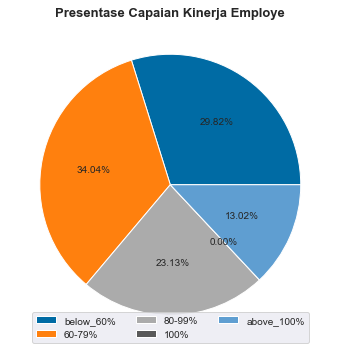

In [112]:
plt.figure(figsize=(9,6))
plt.title('Presentase Capaian Kinerja Employe', fontsize=13, fontweight='bold')
size=[len(employee_below_60),len(employee_60_79), 
     len(employee_80_99), len(employee_100), len(employee_above_100)]

label=['below_60%', '60-79%', '80-99%', '100%', 'above_100%']

plt.pie(size, autopct='%.2f%%')
plt.legend(label, loc='lower center', ncol=3)
plt.show()

### `Achievement_above_100%_during3quartal`

Jumlah pencapaian diatas 100% dalam 3 tahun terkahir

Penamaan Kolom di atas tidak konsisten dengan deskripsinya. Mungkin yang dimaksud ada sesuai dengan deskripsinya

In [113]:
df_train['Achievement_above_100%_during3quartal'].value_counts()

0.0    7597
3.0    1604
1.0    1141
2.0     810
Name: Achievement_above_100%_during3quartal, dtype: int64

- 0 : Tidak pernah mencapain kinerja di atas 100% sama sekali dalam kurun waktu 3 tahun terakhir
- 1 : Mencapai kinerja di atas 100% sebanyak **satu kali** dalam kurun waktu 3 tahun terakhir
- 2 : Mencapai kinerja di atas 100% sebanyak **dua kali** dalam kurun waktu 3 tahun terakhir
- 3 : Mencapai kinerja di atas 100% sebanyak **3 kali** dalam kurun waktu 3 tahun terakhir 

In [114]:
# Check apakah 0 benar tidak pernah mencapai kinerja di atas 100 %
df_train[df_train['Achievement_above_100%_during3quartal']==0]['Last_achievement_%'].max()

85.0

In [115]:
# Check apakah 1 benar pernah mencapai kinerja di atas 100 % setidaknya 1 kali
df_train[df_train['Achievement_above_100%_during3quartal']==1]['Last_achievement_%']

13        73.56
32       102.38
33        97.30
34       103.87
43        88.32
          ...  
11137     56.58
11138    106.44
11139     94.87
11150     85.94
11151     79.99
Name: Last_achievement_%, Length: 1141, dtype: float64

In [116]:
# Check apakah 2 benar pernah mencapai kinerja di atas 100 % setidaknya 2 kali
df_train[df_train['Achievement_above_100%_during3quartal']==2]['Last_achievement_%']

30        91.95
38        73.73
44       113.03
47        99.97
50        88.74
          ...  
11136    108.19
11140    103.75
11142     97.77
11143     96.54
11145    100.48
Name: Last_achievement_%, Length: 810, dtype: float64

In [117]:
# Check apakah 3 benar pernah mencapai kinerja di atas 100 % selama 3 tahun berturut-turut
df_train[df_train['Achievement_above_100%_during3quartal']==3]['Last_achievement_%']

36        88.45
46       121.61
48       105.86
51       109.30
52       101.21
          ...  
11129    106.18
11130     99.35
11131    106.85
11132    104.69
11144    119.74
Name: Last_achievement_%, Length: 1604, dtype: float64

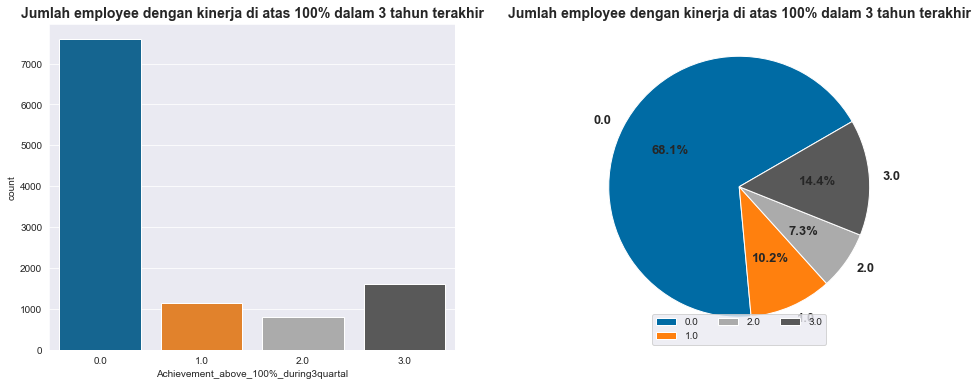

In [118]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('Jumlah employee dengan kinerja di atas 100% dalam 3 tahun terakhir', fontsize=14, fontweight='bold')
sns.countplot(df_train['Achievement_above_100%_during3quartal'])
plt.subplot(122)
plt.title('Jumlah employee dengan kinerja di atas 100% dalam 3 tahun terakhir', fontsize=14, fontweight='bold')
plt.pie(df_train['Achievement_above_100%_during3quartal'].value_counts().sort_index(), 
       autopct='%.1f%%', labels=df_train['Achievement_above_100%_during3quartal'].value_counts().sort_index().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)

plt.legend(loc='lower center', ncol=3)
plt.show()

Check siapa employee yang mencapai target kinerja di atas 100 % 3 tahun terakhir & mencapai target di atas 100% pada tahun ini

In [119]:
df_train[(df_train['Achievement_above_100%_during3quartal']==3) & (df_train['Last_achievement_%']>100.00)]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
46,JG04,1.385641,PG03,1.385641,1.224745,RM_type_A,2,Y,2,level_1,...,3,3,2,3,1,121.61,3.0,1,33,15
48,JG04,1.606238,PG03,1.606238,1.039230,RM_type_A,2,Y,2,level_1,...,3,2,5,10,0,105.86,3.0,1,45,26
51,JG05,2.828427,PG06,2.828427,1.824829,RM_type_A,1,Y,2,level_1,...,7,8,0,8,3,109.30,3.0,1,52,33
52,JG05,2.828427,PG06,2.345208,1.224745,RM_type_A,2,Y,1,level_1,...,7,6,0,0,0,101.21,3.0,1,47,28
61,JG05,2.828427,PG06,2.236068,0.707107,RM_type_A,2,Y,2,level_1,...,12,6,3,3,2,101.44,3.0,1,46,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11117,JG05,1.081665,PG05,1.081665,1.224745,RM_type_A,1,Y,2,level_5,...,11,8,1,0,2,110.57,3.0,1,49,12
11129,JG04,1.385641,PG03,1.385641,2.179449,RM_type_C,2,N,0,level_5,...,2,3,3,6,0,106.18,3.0,1,32,4
11131,JG04,1.658312,PG03,1.658312,0.707107,RM_type_A,2,N,0,level_5,...,2,4,0,4,0,106.85,3.0,1,33,7
11132,JG04,1.385641,PG03,1.385641,1.118034,RM_type_A,2,Y,2,level_5,...,4,4,3,3,7,104.69,3.0,1,39,11


In [120]:
df_train[(df_train['Achievement_above_100%_during3quartal']==3) & (df_train['Last_achievement_%']>100.00)]['Last_achievement_%'].describe()

count    1041.000000
mean      109.705514
std         6.837995
min       100.020000
25%       104.220000
50%       108.450000
75%       113.800000
max       130.000000
Name: Last_achievement_%, dtype: float64

In [121]:
df_train[(df_train['Achievement_above_100%_during3quartal']==3) & (df_train['Last_achievement_%']>100.00)]['Achievement_above_100%_during3quartal'].value_counts()

3.0    1041
Name: Achievement_above_100%_during3quartal, dtype: int64

**Ada 1041 employee yang mencapai target kinerja di atas 100 % 3 tahun terakhir & mencapai target di atas 100% pada triwulan akhir**

### `Best Performance`

Termasuk dalam best performance (1/0)

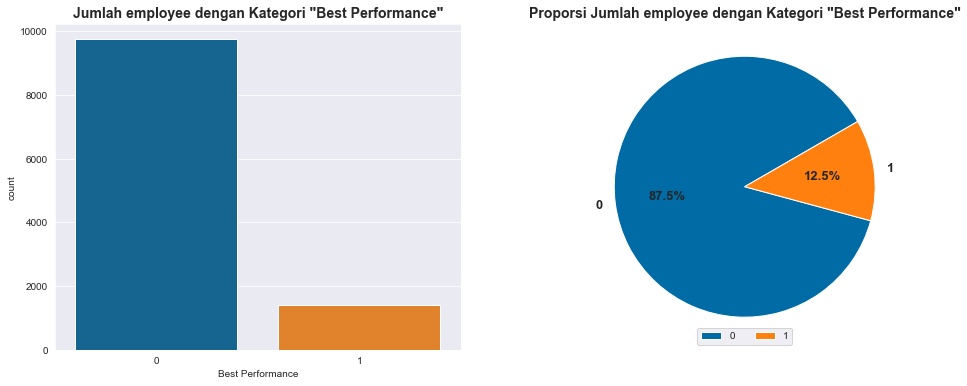

In [122]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
sns.countplot(df_train['Best Performance'])
plt.subplot(122)
plt.title('Proporsi Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
plt.pie(df_train['Best Performance'].value_counts(), 
       autopct='%.1f%%', labels=df_train['Best Performance'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)

plt.legend(loc='lower center', ncol=3)
plt.show()